# Coronavirus Exploration

In [1]:
#Pandas is an open-source Python Library providing high-performance data manipulation and analysis tool
#using its powerful data structures. 
#The name Pandas is derived from the word Panel Data – an Econometrics from Multidimensional data.
#panda is dependent on numpy module.

import pandas as pd

In [2]:
#read_csv method is of panda module used to read csv file.
covid=pd.read_csv('covid_19_data.csv')

#printing first five records of dataset
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
#Pandas dataframe.info() function is used to get a concise summary of the dataframe.

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59759 entries, 0 to 59758
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              59759 non-null  int64  
 1   ObservationDate  59759 non-null  object 
 2   Province/State   37350 non-null  object 
 3   Country/Region   59759 non-null  object 
 4   Last Update      59759 non-null  object 
 5   Confirmed        59759 non-null  float64
 6   Deaths           59759 non-null  float64
 7   Recovered        59759 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 3.6+ MB


In [4]:
covid.describe()

,SNo,Confirmed,Deaths,Recovered
count,59759.000000,59759.000000,59759.000000,59759.000000
mean,29880.000000,9307.219113,530.849613,4035.499322
std,17251.081705,29341.110695,2468.054414,22713.450487
min,1.000000,0.000000,0.000000,0.000000
25%,14940.500000,87.000000,1.000000,0.000000
50%,29880.000000,839.000000,13.000000,98.000000
75%,44819.500000,4579.500000,144.000000,1179.000000
max,59759.000000,405843.000000,41128.000000,953420.000000


In [5]:
covid['ObservationDate'].value_counts()

06/25/2020    729
06/30/2020    729
06/18/2020    729
06/15/2020    729
07/02/2020    729
             ... 
01/26/2020     47
01/23/2020     46
01/25/2020     44
01/24/2020     41
01/22/2020     38
Name: ObservationDate, Length: 169, dtype: int64

In [6]:
covid['ObservationDate'].unique()

array(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020',
       '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020',
       '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020',
       '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020',
       '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
       '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020',
       '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020',
       '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020',
       '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020',
       '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
       '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020',
       '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020',
       '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020',
       '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020',
       '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020',
       '03/22/2020', '03/23/2020', '03/24/2020', '03/25

## CLEANING DATASET1 19 DATA

In [7]:
#We can also find missong value using below code

#missing_values = ["n/a", "na", "--"]
#df = pd.read_csv("property data.csv", na_values = missing_values)

#we can fill missing value  using fillna() as below:

#fillna("No Gender", inplace = True)  

#Pandas Series.isnull() function detect missing values in the given series object.
#Python provide an inbuilt function sum() which sums up the numbers in the list.
#therefore isnull().sum() returns the sum of missing values.

mis=covid.isnull().sum()

#mis wll print all columns and show no. of missing values
#Sno                   0
#ObservationDate       0
#Province/State     18353
#Country/Region        0
#Last Update           0
#Confirmed             0
#Deaths                0
#Recovered             0


#Instead we used mis[mis>0] which will print missing no. gretaer than 0
mis[mis>0]

Province/State    22409
dtype: int64

In [8]:
#only one column has missing data it is Provice/State and 1815 rows are missing.

#to get the number of rows and columns in our dataset, we use shape.
covid.shape

(59759, 8)

In [9]:
#Using imputer to fill missing value or complete missing values.
#sklearn is a module for machine learning bulit.

from sklearn.impute import SimpleImputer

In [10]:
#while delaing with string type we use 'most_frequent' or 'constant' strategy:
#for int we can use mean,median or others.

imputer=SimpleImputer(strategy='constant')

#fit_transform(self, X[, y])Fit to data, then transform it.

impute_covid = pd.DataFrame(imputer.fit_transform(covid), columns=covid.columns)

#Now we will print our dataset with complete values.
impute_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [11]:
#pandas.to_datetime Convert argument to datetime.

impute_covid['ObservationDate'] = pd.to_datetime(impute_covid['ObservationDate'])
impute_covid['Last Update'] = pd.to_datetime(impute_covid['Last Update'])

#pandas.to_numeric Convert argument to a numeric type.
impute_covid['Confirmed'] = pd.to_numeric(impute_covid['Confirmed'], errors='coerce')
impute_covid['Recovered'] = pd.to_numeric(impute_covid['Recovered'], errors='coerce')
impute_covid['Deaths'] = pd.to_numeric(impute_covid['Deaths'], errors='coerce')

In [12]:
#now if we use info() with our complete value dataframe there will be all rows complteted.

impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59759 entries, 0 to 59758
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              59759 non-null  object        
 1   ObservationDate  59759 non-null  datetime64[ns]
 2   Province/State   59759 non-null  object        
 3   Country/Region   59759 non-null  object        
 4   Last Update      59759 non-null  datetime64[ns]
 5   Confirmed        59759 non-null  float64       
 6   Deaths           59759 non-null  float64       
 7   Recovered        59759 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 3.6+ MB


In [13]:
#Generally describe() function excludes the character columns and gives summary statistics of numeric columns
#We need to add a variable named include=’all’ to get the summary statistics or descriptive statistics of both numeric and 
#character column.

impute_covid.describe()

,Confirmed,Deaths,Recovered
count,59759.000000,59759.000000,59759.000000
mean,9307.219113,530.849613,4035.499322
std,29341.110695,2468.054414,22713.450487
min,0.000000,0.000000,0.000000
25%,87.000000,1.000000,0.000000
50%,839.000000,13.000000,98.000000
75%,4579.500000,144.000000,1179.000000
max,405843.000000,41128.000000,953420.000000


In [14]:
#impute_covid.describe(include='all')

## Feature Statistics and Visualization

In [15]:
# see again data table
impute_covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [16]:
import numpy as np

In [17]:
#Let we Compute active_confirmed

#Here, we obtain the combined attribute namely active_confirmed by using a formulae:
#Confirmed - (Deaths + Recovered)

impute_covid['active_confirmed'] = impute_covid['Confirmed'].values - \
(impute_covid['Deaths'].values+impute_covid['Recovered'].values)

In [18]:
#check if all is ok
impute_covid.isnull().sum().sum()

0

In [19]:
#ok we have no problem see table data
impute_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59759 entries, 0 to 59758
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SNo               59759 non-null  object        
 1   ObservationDate   59759 non-null  datetime64[ns]
 2   Province/State    59759 non-null  object        
 3   Country/Region    59759 non-null  object        
 4   Last Update       59759 non-null  datetime64[ns]
 5   Confirmed         59759 non-null  float64       
 6   Deaths            59759 non-null  float64       
 7   Recovered         59759 non-null  float64       
 8   active_confirmed  59759 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(3)
memory usage: 4.1+ MB


## Finding Correlations

In [20]:
#corr() function performs pair-wise correlations, you have four pair from two variables. 
#So, basically you are getting diagonal values as auto correlation (correlation with itself, 
#two values since you have two variables), and other two values as cross correlations of one vs another and vice versa.

impute_covid.corr()

,Confirmed,Deaths,Recovered,active_confirmed
Confirmed,1.000000,0.806031,0.350878,0.675479
Deaths,0.806031,1.000000,0.221745,0.562670
Recovered,0.350878,0.221745,1.000000,-0.451858
active_confirmed,0.675479,0.562670,-0.451858,1.000000


In [21]:
#Confirmed and Deaths are most correlated
#Recovered and Deaths are more correlated
#Confirmed and Recovered are more less correlated
#active confirmed and confirmed are more correlated

In [22]:
features = [['Confirmed', 'Deaths'], ['Confirmed', 'Recovered'], ['Recovered', 'Deaths'], \
            ['Confirmed', 'active_confirmed']]
values = [[impute_covid['Confirmed'], impute_covid['Deaths']],\
          [impute_covid['Confirmed'], impute_covid['Recovered']],\
          [impute_covid['Recovered'], impute_covid['Deaths']],\
          [impute_covid['Confirmed'], impute_covid['active_confirmed']]]

In [23]:
import matplotlib.pyplot as plt

In [24]:
%matplotlib inline

#Now you have hvplot / holoviews as your 
#plotting backend for pandas and it will give you interactive holoviews plots instead of static matplotlib plots.
#Using options.plotting.backend you can set hvplot as follows:
#pd.options.plotting.backend = 'hvplot'

pd.options.plotting.backend

#This function modifies the global matplotlib.units.registry dictionary. Pandas adds custom converters for
#pd.Timestamp
#pd.Period
#np.datetime64
#datetime.datetime
#datetime.date
#datetime.time

pd.plotting.register_matplotlib_converters()

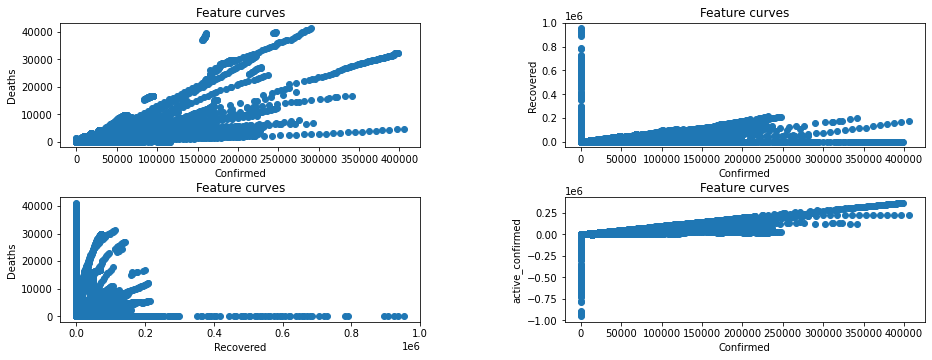

In [25]:
#The matplotlib.figure module contains the Figure class. It is a top-level container for all plot elements.
#The Figure object is instantiated by calling the figure() function from the pyplot module −

fig = plt.figure(figsize=(15.5,5.5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    col = features[i-1]
    val = values[i-1]
    ax.scatter(val[0], val[1])
    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.set_title('Feature curves')
plt.show()

* If the data show an uphill pattern as you move from left to right, this indicates a positive relationship between X and Y. 

* if the data show a downhill pattern as you move from left to right, this indicates a negative relationship between X and Y.

* If the data don’t seem to resemble any kind of pattern (even a vague one), then no relationship exists between X and Y.

## Day Level Information in our dataset

In [26]:
#Now we will find the Start date and End Date From the column observation Date

start_date = impute_covid.ObservationDate.min()
end_date = impute_covid.ObservationDate.max()
print('1. Start date = {}\n2. End date ={}'.format(start_date, end_date))

1. Start date = 2020-01-22 00:00:00
2. End date =2020-07-08 00:00:00


In [27]:
#Now getting the Rows in which observation date matches the end date

worldwide = impute_covid[impute_covid['ObservationDate'] == end_date]

In [28]:
#Getting the Countries whose observation date matches the end date(i.e. world wide)
#Means the countries are still affected by coronavirus.

worldwide['Country/Region'].value_counts()

Russia        83
US            58
Japan         48
India         36
Colombia      34
              ..
Kyrgyzstan     1
Jordan         1
Morocco        1
Libya          1
Angola         1
Name: Country/Region, Length: 190, dtype: int64

In [29]:
#Counting the Total number of countries which are affected on end date

nb_country = len(worldwide['Country/Region'].value_counts()) 
nb_country

190

In [30]:
#Getting the Total number of Confirmed, Death , Recovered and Active_Confirmed Cases in each Country.(i.e. in World).

world = worldwide.groupby('Country/Region').sum()
world

,Confirmed,Deaths,Recovered,active_confirmed
Country/Region,,,,
Afghanistan,33594.0,936.0,20700.0,11958.0
Albania,3106.0,83.0,1791.0,1232.0
Algeria,17348.0,978.0,12329.0,4041.0
Andorra,855.0,52.0,802.0,1.0
Angola,386.0,21.0,117.0,248.0
...,...,...,...,...
West Bank and Gaza,5029.0,20.0,494.0,4515.0
Western Sahara,10.0,1.0,8.0,1.0
Yemen,1318.0,351.0,595.0,372.0


In [31]:
#Getting the Most Affected Countries in the world.
#Here we sort values on basis of confirmed cases in descending order by giving value of ascending=False.

world = world.sort_values(by=['Confirmed'], ascending=False)
world.head()

,Confirmed,Deaths,Recovered,active_confirmed
Country/Region,,,,
US,3054699.0,132300.0,953420.0,1968979.0
Brazil,1713160.0,67964.0,1139844.0,505352.0
India,767296.0,21129.0,476378.0,269789.0
Russia,699749.0,10650.0,471718.0,217381.0
Peru,312911.0,11133.0,204748.0,97030.0


## Checking the world wide report

In [32]:
#In world wide report, we will count:
#Total Confirmed

#Toetal Deaths
#Total Reccovered
#Total Active_confirmed
#Total Confirmed Recorded

print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n\
Total country Recorded: {} \n'.format(\
worldwide.Confirmed.sum(), worldwide.Deaths.sum(), worldwide.Recovered.sum(), worldwide.active_confirmed.sum(),nb_country))

Tota confirmed: 12041480.0
Total Deaths: 549468.0
Total Recovered: 6586726.0
Total active confirmed: 4905286.0
Total country Recorded: 190 



## Visualization

Text(0, 0.5, 'Total Cases')

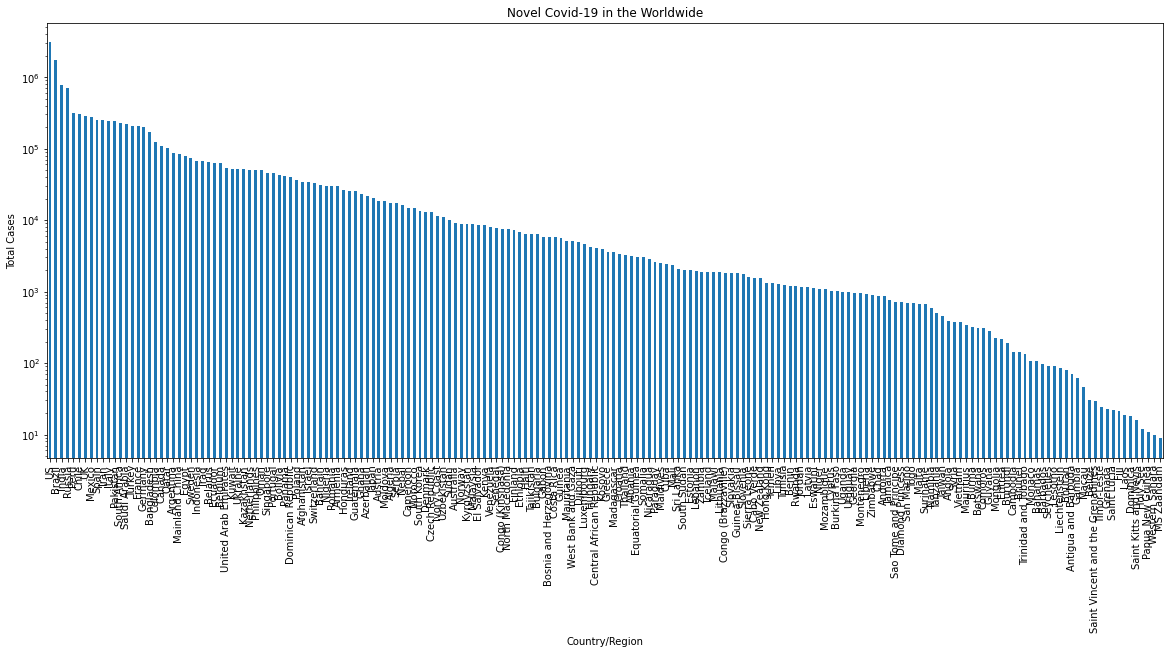

In [33]:
#Data of Confirmed cases in each Country

world.Confirmed.plot(kind='bar', title= 'Novel Covid-19 in the Worldwide', figsize=(20,8), logy=True)
plt.ylabel('Total Cases')

Text(0, 0.5, 'Total Recovered')

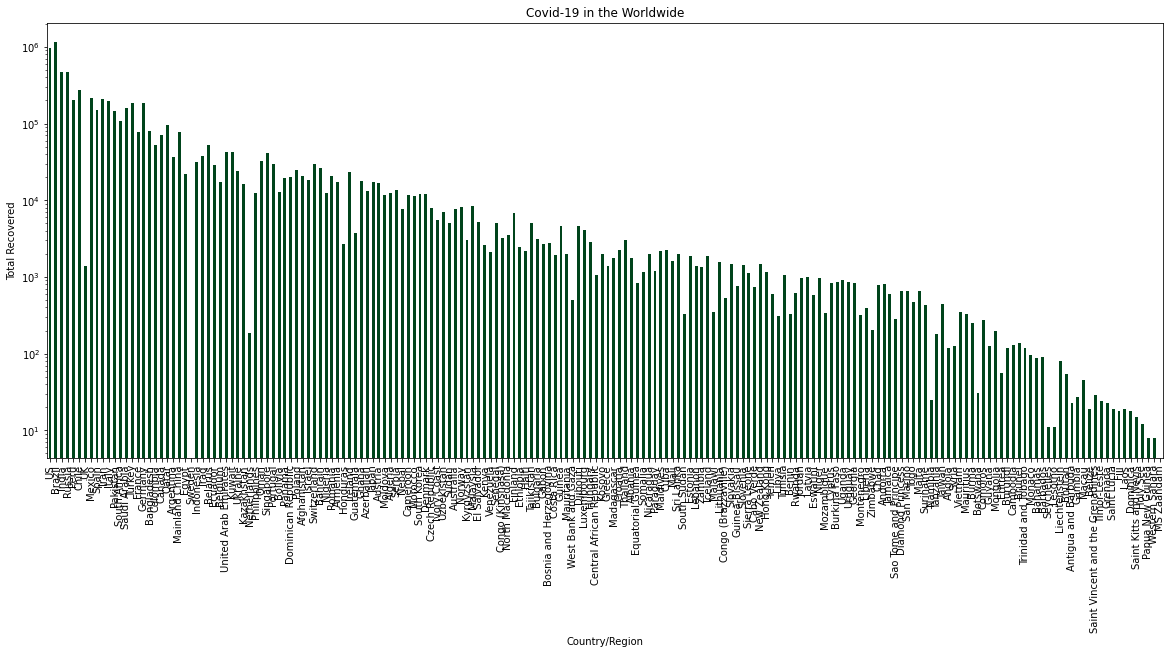

In [34]:
## Data of Recovered Cases in each Country

world.Recovered.plot(kind='bar', title= 'Covid-19 in the Worldwide', figsize=(20,8), logy=True,colormap='Greens_r')
plt.ylabel('Total Recovered')

Text(0, 0.5, 'Total Deaths')

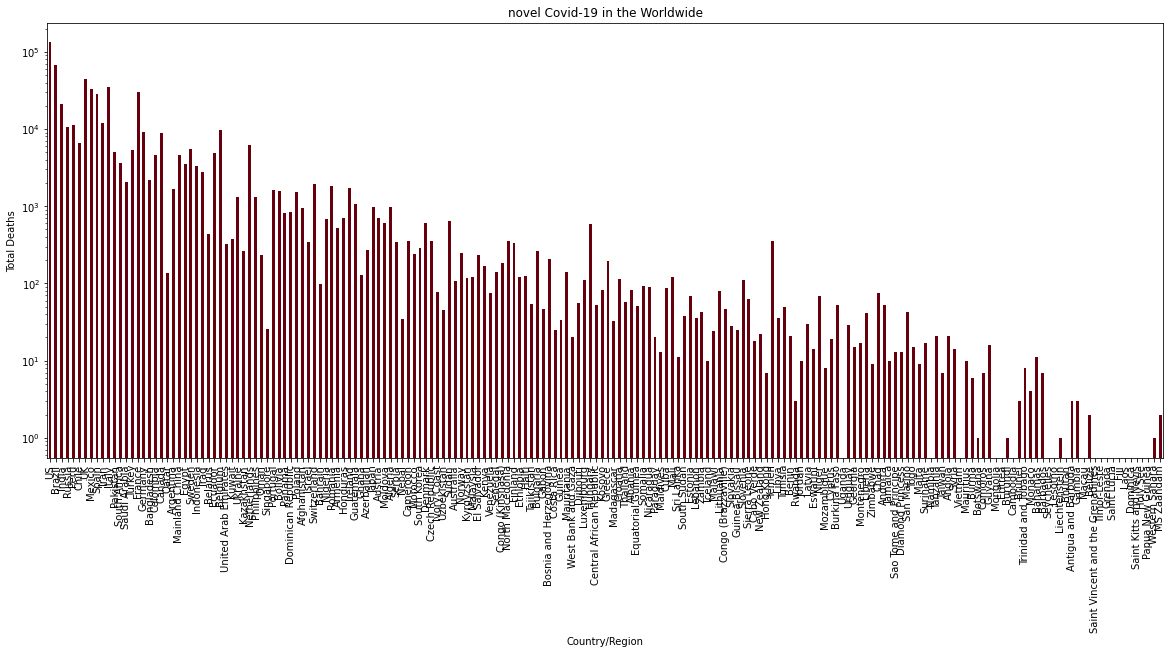

In [35]:
#Data of Death Cases in each Country.

world.Deaths.plot(kind='bar', title= 'novel Covid-19 in the Worldwide', figsize=(20,8), logy=True,colormap='Reds_r')
plt.ylabel('Total Deaths')

Text(0, 0.5, 'Total  Active Cases')

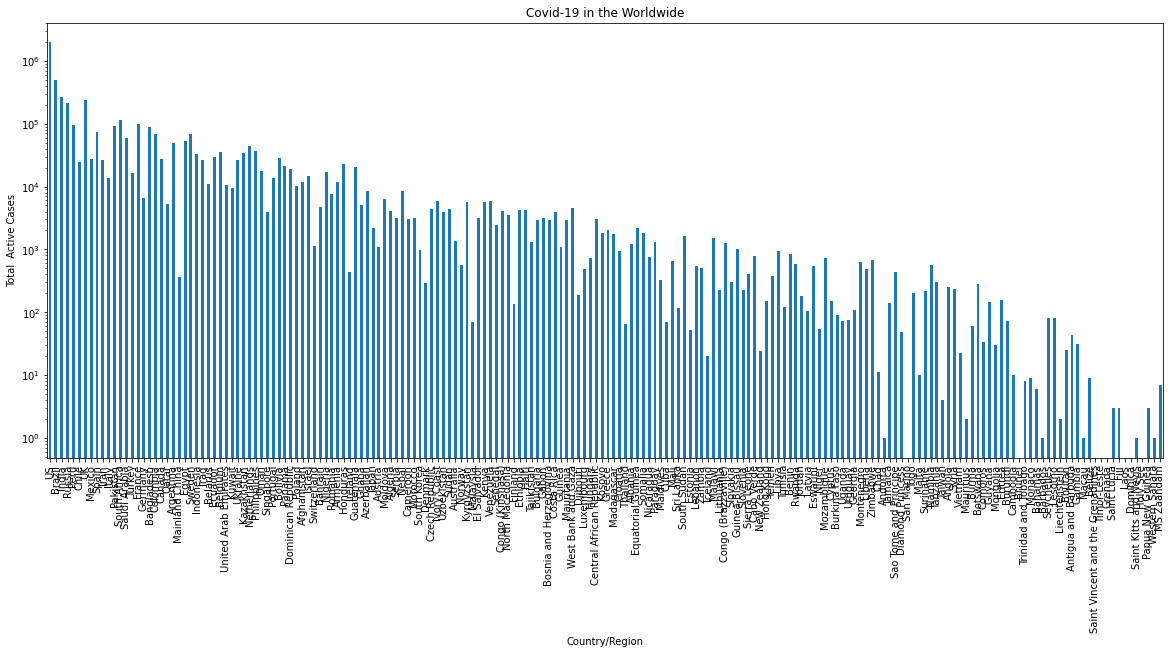

In [36]:
#Data of Active Confirmed Cases in each Country.

world.active_confirmed.plot(kind='bar', title= 'Covid-19 in the Worldwide', figsize=(20,8), logy=True,)
plt.ylabel('Total  Active Cases')

In [37]:
#In this part I plot the country are most affected by the covid-19 on graph and table for the other country

In [38]:
#Pandas reset_index() is a method to reset index of a Data Frame.
#reset_index() method sets a list of integer ranging from 0 to length of data as index.

#Here, we will get the total countries and set index from 0 to the world data index.

world_table = world.reset_index()
world_table

,Country/Region,Confirmed,Deaths,Recovered,active_confirmed
0,US,3054699.0,132300.0,953420.0,1968979.0
1,Brazil,1713160.0,67964.0,1139844.0,505352.0
2,India,767296.0,21129.0,476378.0,269789.0
3,Russia,699749.0,10650.0,471718.0,217381.0
4,Peru,312911.0,11133.0,204748.0,97030.0
...,...,...,...,...,...
185,Saint Kitts and Nevis,16.0,0.0,15.0,1.0
186,Holy See,12.0,0.0,12.0,0.0
187,Papua New Guinea,11.0,0.0,8.0,3.0
188,Western Sahara,10.0,1.0,8.0,1.0


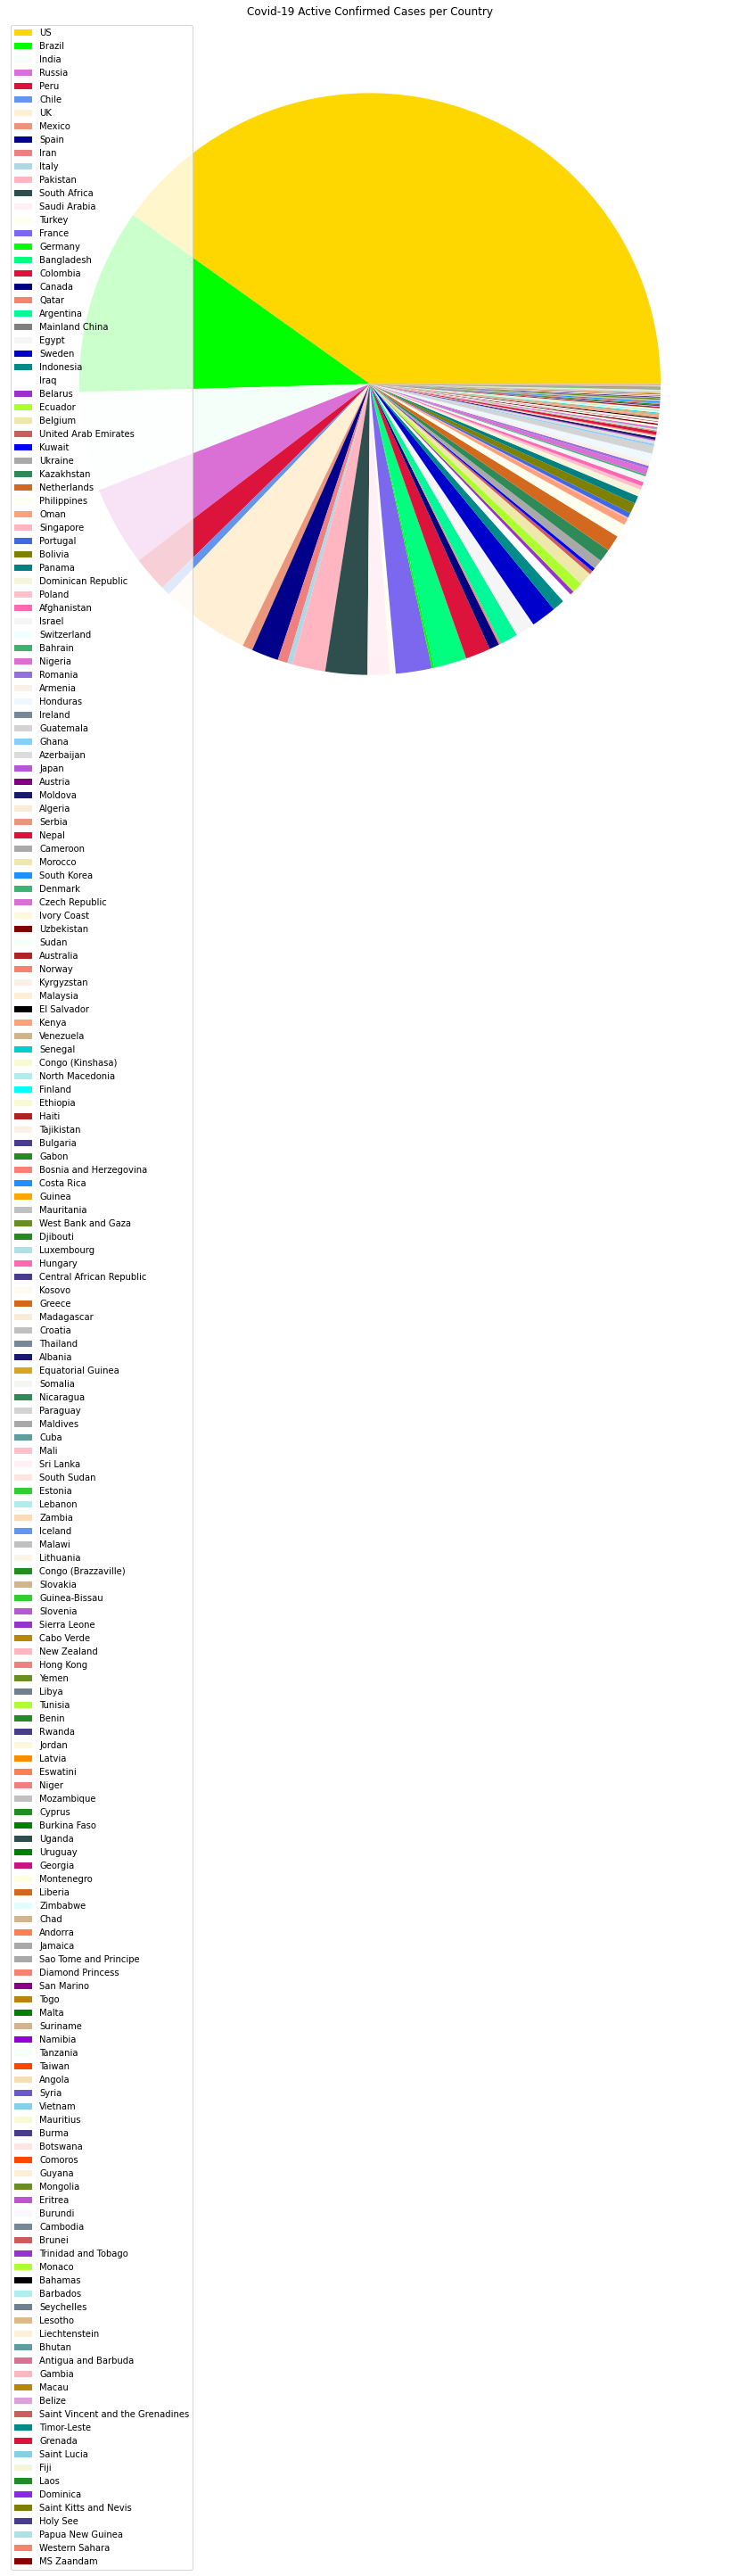

In [39]:
unique_countries=world_table['Country/Region'].unique()
import random
import matplotlib.colors as mcolors
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(world_table['Country/Region']))
plt.figure(figsize=(15,15))
plt.title("Covid-19 Active Confirmed Cases per Country")
plt.pie(world_table['active_confirmed'],colors=c)
plt.legend(unique_countries,loc="best")
plt.show()


In [40]:
# we see the seven country most affected by novel covid-19

x = world_table[world_table['Country/Region'] == 'US']
big_7 = world_table[world_table['Confirmed'] >= x.iloc[0,1]]

#big_7
#To print big_7 with formatting we use style with its value

big_7.style.background_gradient(cmap='viridis')

,Country/Region,Confirmed,Deaths,Recovered,active_confirmed
0,US,3054699.000000,132300.000000,953420.000000,1968979.000000


Text(0.5, 0, ' ')

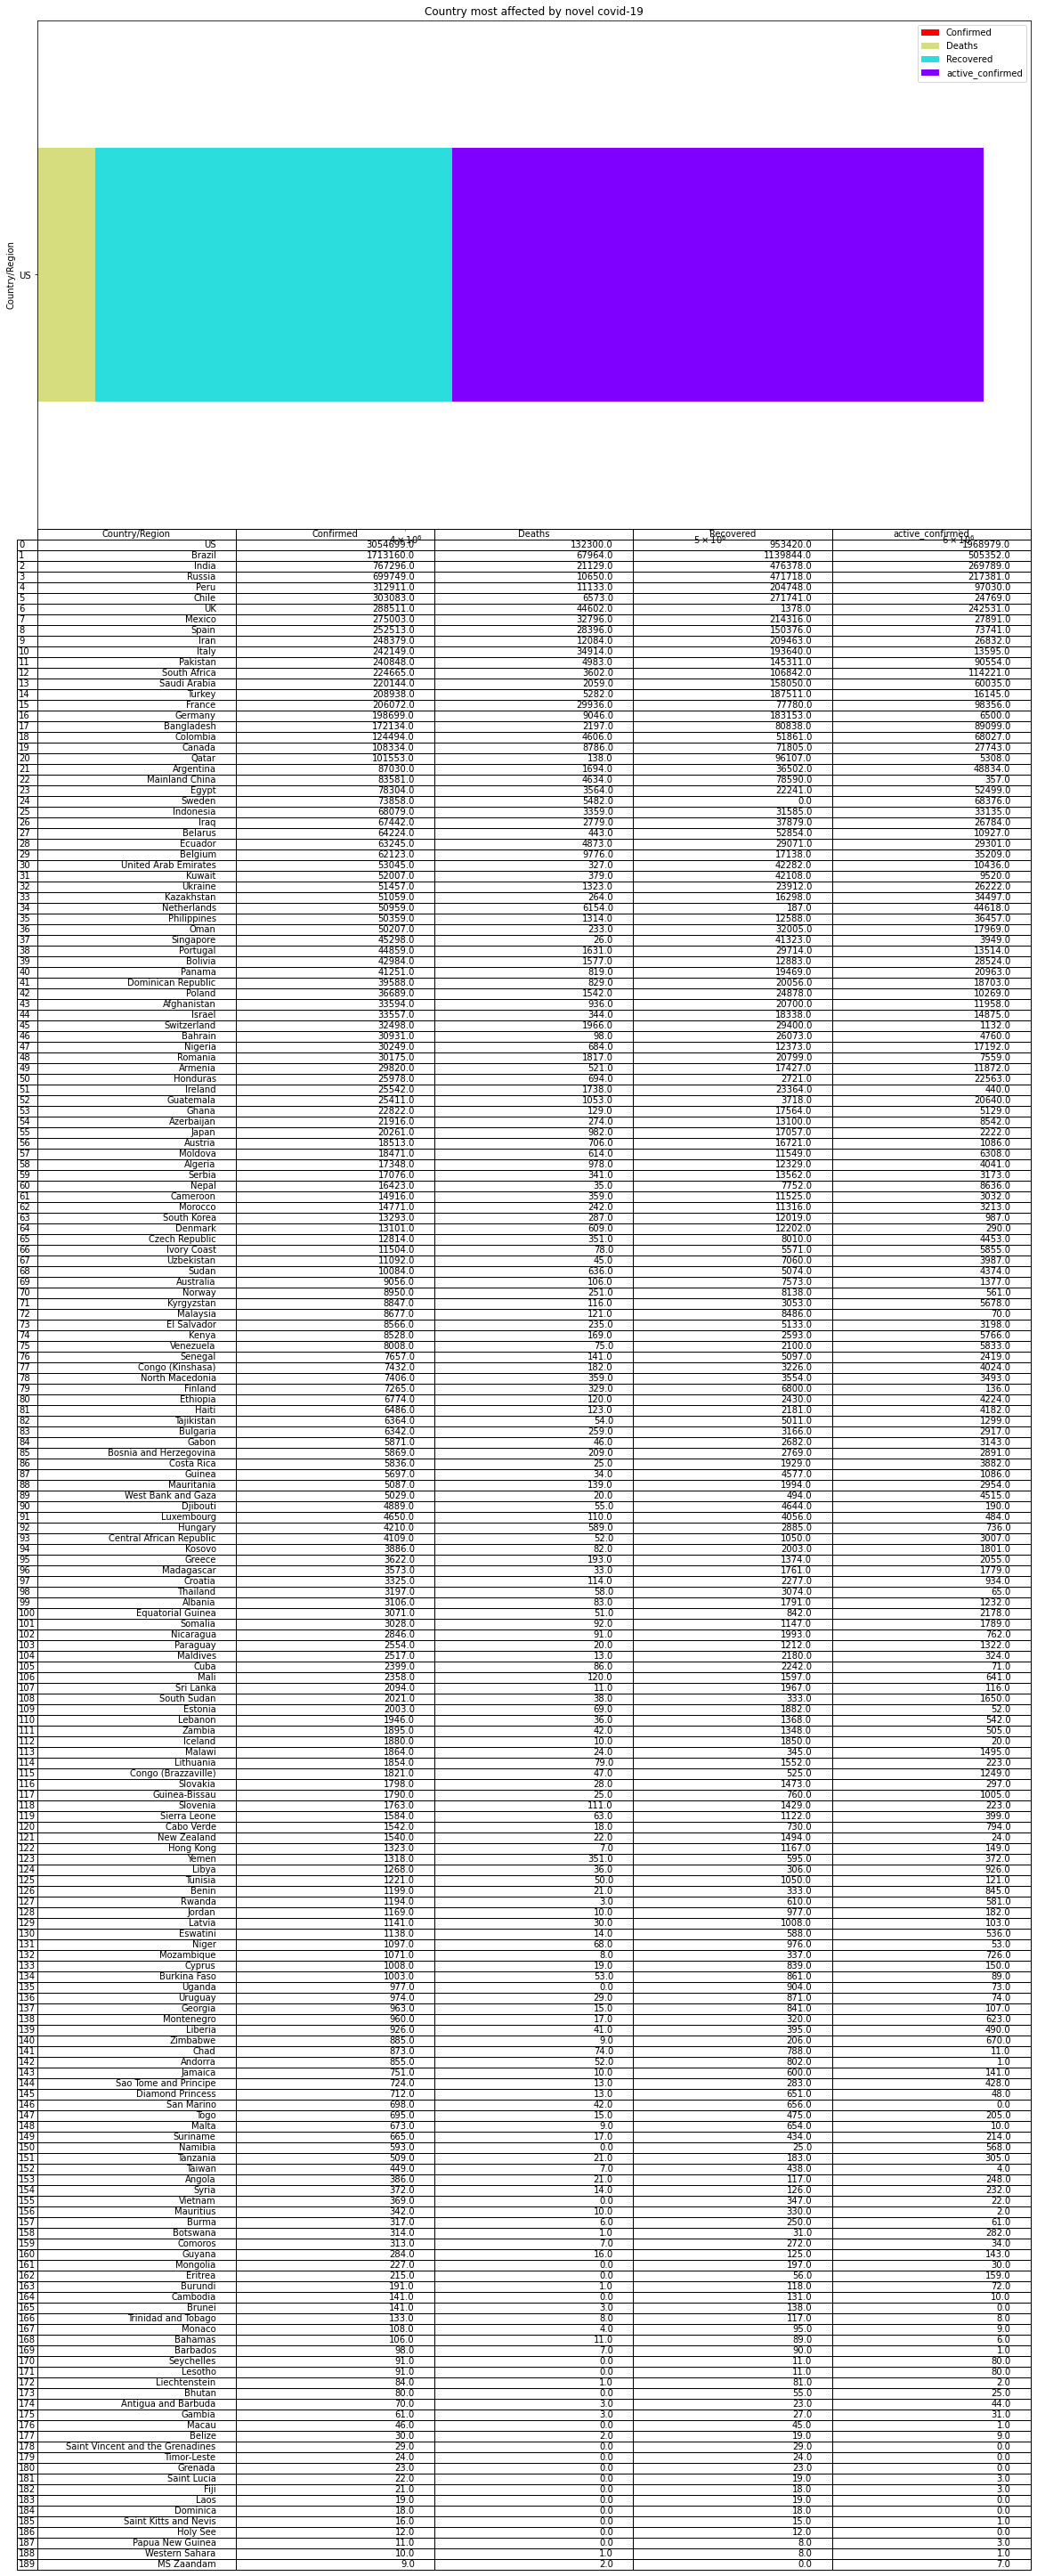

In [41]:
#To get Seven most affected Countries in the world.
#we will use a table of a plotting of pandas librarry.

axs = big_7.plot('Country/Region', ['Confirmed', 'Deaths', 'Recovered', 'active_confirmed'], kind='barh',\
                 stacked=True, title='Country most affected by novel covid-19',\
                 figsize=(20,10.5),colormap='rainbow_r', logx=True, legend=True) 
pd.plotting.table(data=world_table, rowLabels=world.index, colLabels=world.columns, ax=axs)
plt.xlabel(' ')

## TIME

In [42]:
#.aggregate() function is used to apply some aggregation across one or more column.
#sum: Return the sum of the values for the requested axis
#min: Return the minimum of the values for the requested axis
#max: Return the maximum of the values for the requested axis

#Now, here we used sum to get the column sum group by Observation date

time_obs = impute_covid.groupby('ObservationDate')['Confirmed'].aggregate([np.sum])
time_obs.columns = ['Confirmed']

Text(0, 0.5, 'Total Confirmed observation')

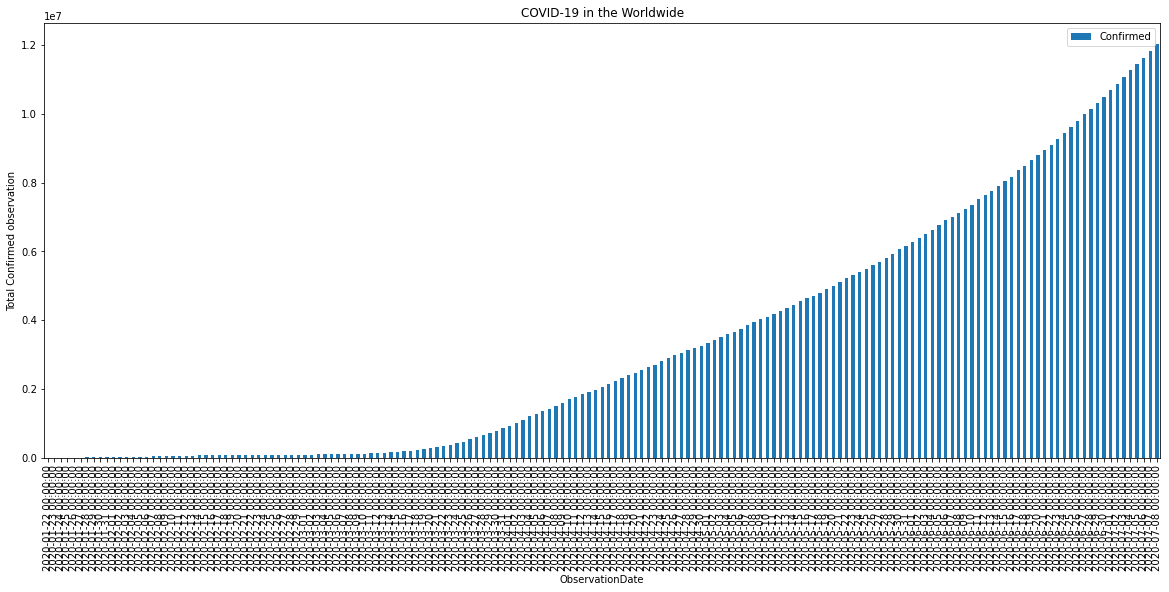

In [43]:
#Plotting the Confirmed Observation Group by Observation Date

time_obs.plot(figsize=(20,8), title='COVID-19 in the Worldwide', kind='bar')

plt.ylabel('Total Confirmed observation')

In [44]:
#Similarly ,as we do for Confirmed cases now, we calculate same for Death,Recovered andA Active Confirmed cases.

death_rate = impute_covid.groupby('ObservationDate')['Deaths'].aggregate([np.sum])
recovered_rate = impute_covid.groupby('ObservationDate')['Recovered'].aggregate([np.sum])
activecase_rate = impute_covid.groupby('ObservationDate')['active_confirmed'].aggregate([np.sum])
death_rate.columns = ['Death rate']
recovered_rate.columns = ['Recovered rate']
activecase_rate.columns = ['Active confirmed rate']

Text(0, 0.5, 'Total patient')

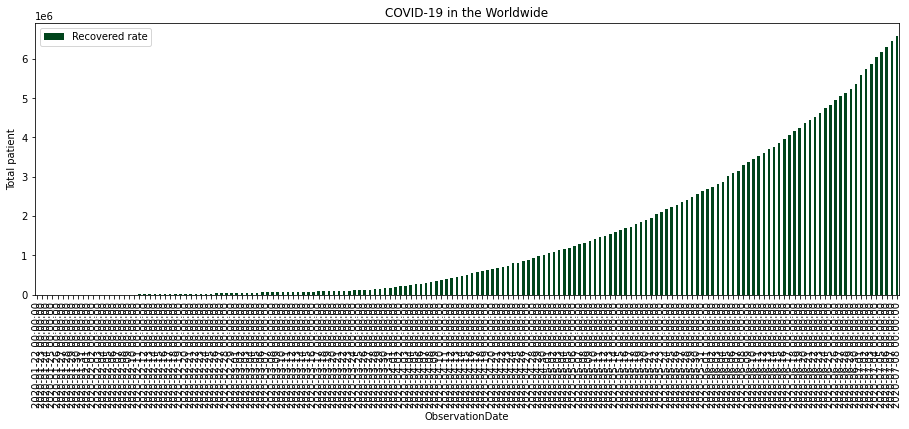

In [45]:
#Plotting the Recovered Observation Group by Observation Date

recovered_rate.plot(figsize=(15.5, 5), title='COVID-19 in the Worldwide', colormap='Greens_r', kind='bar')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

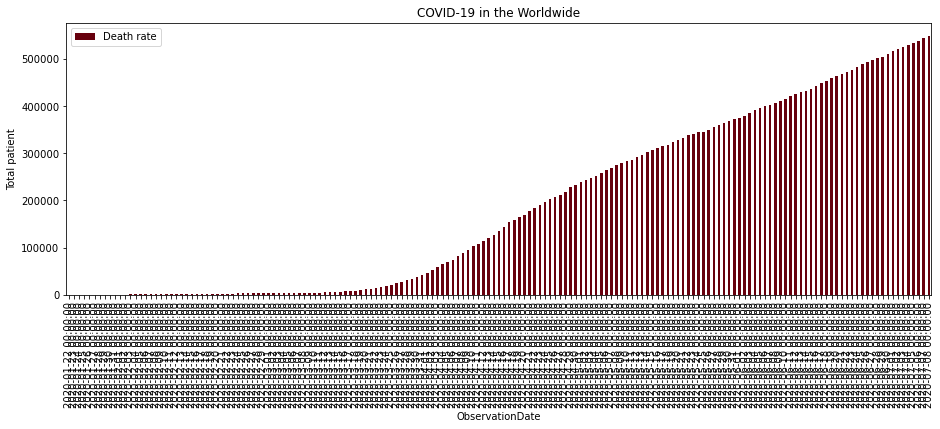

In [46]:
#Plotting the Death Observation Group by Observation Date

death_rate.plot(figsize=(15.5, 5), title='COVID-19 in the Worldwide', colormap='Reds_r', kind='bar')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

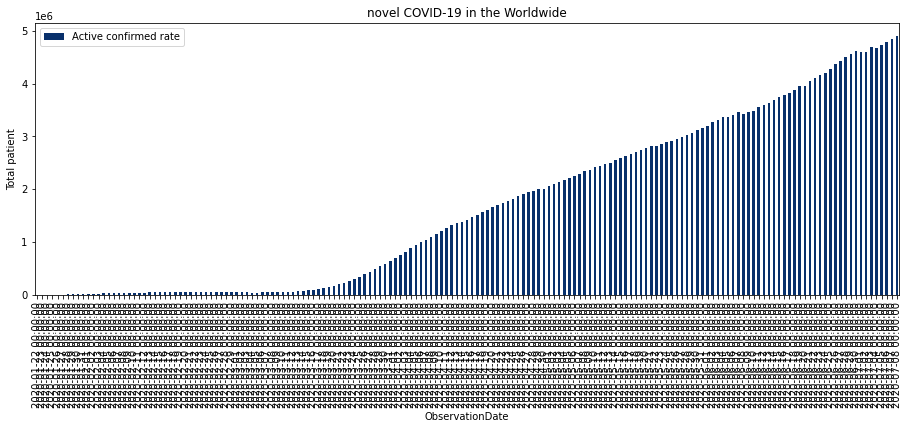

In [47]:
#Plotting the Active Confirmed Observation Group by Observation Date

activecase_rate.plot(figsize=(15.5, 5), title='novel COVID-19 in the Worldwide', colormap='Blues_r', kind='bar')
plt.ylabel('Total patient')

## Special China


In [48]:
#COVID-19 come from this country that why I make attention to see the behaviour of this desease in that country.

In [49]:
china = impute_covid[impute_covid['Country/Region'] == 'Mainland China']

In [50]:
chstart_date = china.ObservationDate.min()
chend_date = china.ObservationDate.max()

In [51]:
print('Novel covid-19 China:\nstart date = {}\nend date = {}'.format(chstart_date, chend_date))

Novel covid-19 China:
start date = 2020-01-22 00:00:00
end date = 2020-07-08 00:00:00


In [52]:
lastChina = china[china['ObservationDate'] == chend_date]
lastChina.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
59221,59222,2020-07-08,Anhui,Mainland China,2020-07-09 04:34:23,991.0,6.0,985.0,0.0
59254,59255,2020-07-08,Beijing,Mainland China,2020-07-09 04:34:23,929.0,9.0,645.0,275.0
59303,59304,2020-07-08,Chongqing,Mainland China,2020-07-09 04:34:23,582.0,6.0,575.0,1.0
59340,59341,2020-07-08,Fujian,Mainland China,2020-07-09 04:34:23,363.0,1.0,360.0,2.0
59345,59346,2020-07-08,Gansu,Mainland China,2020-07-09 04:34:23,167.0,2.0,162.0,3.0


## CHINA REPORT

In [53]:
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastChina.Confirmed.sum(), lastChina.Deaths.sum(), lastChina.Recovered.sum(), lastChina.active_confirmed.sum()))

Tota confirmed: 83581.0
Total Deaths: 4634.0
Total Recovered: 78590.0
Total active confirmed: 357.0



In [54]:
lastChina[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
59221,Anhui,991.000000,6.000000,985.000000,0.000000
59254,Beijing,929.000000,9.000000,645.000000,275.000000
59303,Chongqing,582.000000,6.000000,575.000000,1.000000
59340,Fujian,363.000000,1.000000,360.000000,2.000000
59345,Gansu,167.000000,2.000000,162.000000,3.000000
59361,Guangdong,1647.000000,8.000000,1631.000000,8.000000
59362,Guangxi,254.000000,2.000000,252.000000,0.000000
59365,Guizhou,147.000000,2.000000,145.000000,0.000000
59368,Hainan,171.000000,6.000000,165.000000,0.000000
59373,Hebei,349.000000,6.000000,339.000000,4.000000


In [55]:
#Covid-19 into Province

#patient confirmed
#patient recovered
#patient death

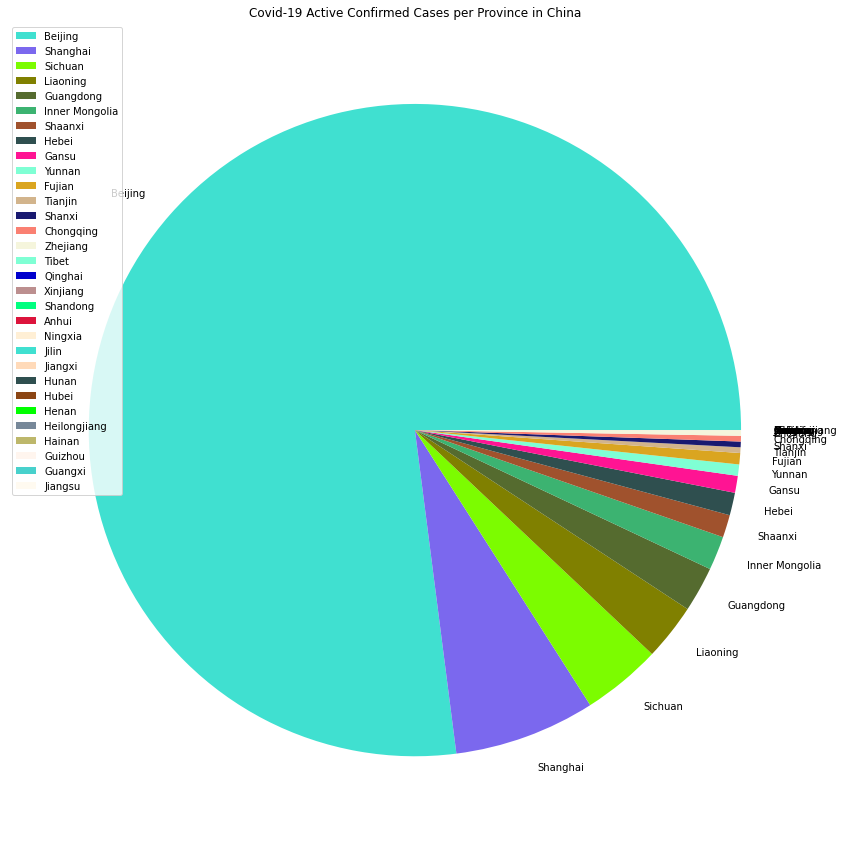

In [56]:
China = lastChina.sort_values(by=['active_confirmed'], ascending=False)
unique_countries=China['Province/State'].unique()
import random
import matplotlib.colors as mcolors
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(China['Province/State']))
plt.figure(figsize=(15,15))
plt.title("Covid-19 Active Confirmed Cases per Province in China")
plt.pie(China['active_confirmed'],colors=c,labels=unique_countries)
plt.legend(unique_countries,loc="best")
plt.show()

In [57]:
province = lastChina.groupby('Province/State').sum()
province = province.sort_values(by=['Confirmed'], ascending=False)

Text(0, 0.5, 'Total patient')

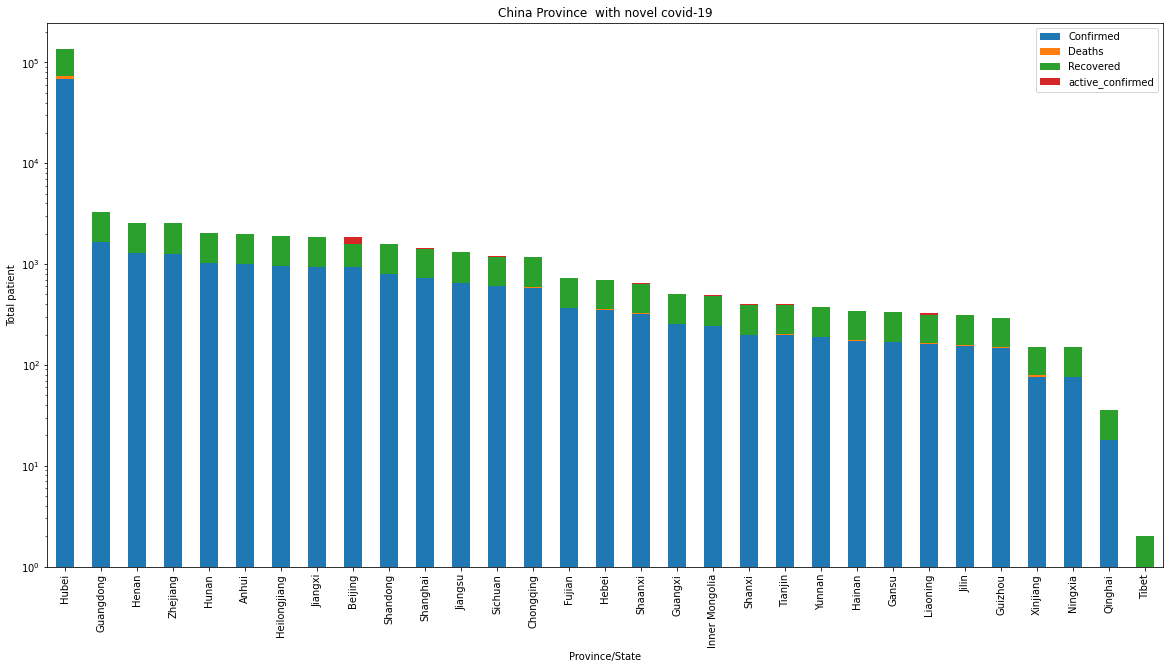

In [58]:
province.plot(kind='bar', label='Confirmed',logy=True,figsize=(20,10), stacked=True,title='China Province  with novel covid-19')
plt.ylabel('Total patient')

In [59]:
conf_china = china.groupby('ObservationDate')['Confirmed'].agg('sum')
rec_china = china.groupby('ObservationDate')['Recovered'].agg('sum')
dea_china = china.groupby('ObservationDate')['Deaths'].agg('sum')
ac_china = china.groupby('ObservationDate')['active_confirmed'].agg('sum')

Text(0, 0.5, 'Total patient')

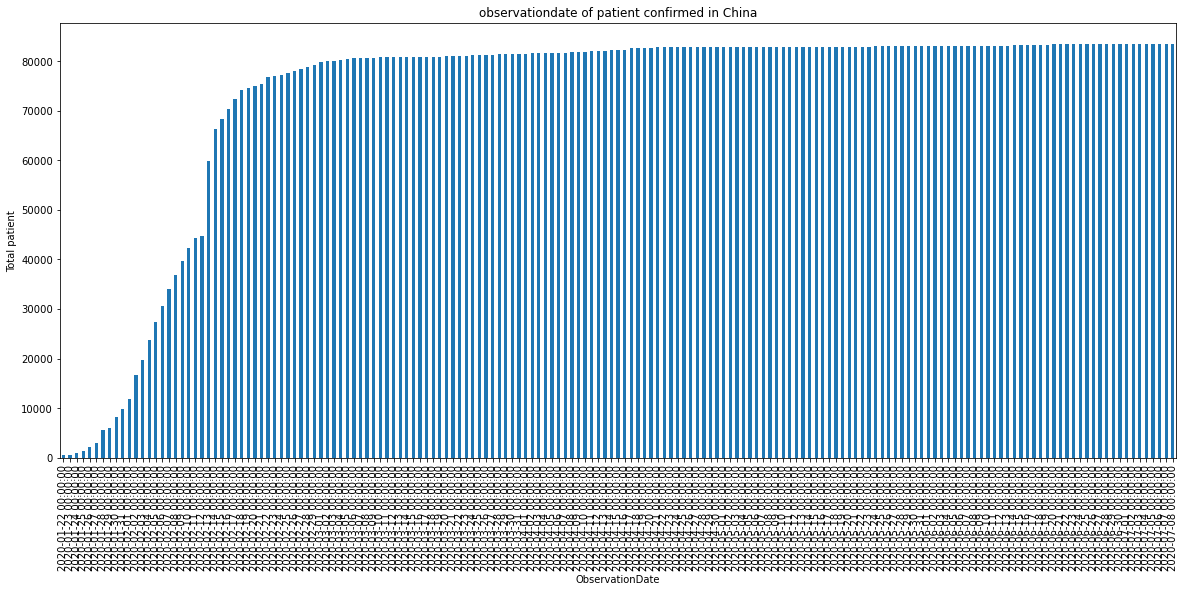

In [60]:
conf_china.plot(figsize=(20,8), kind='bar',title='observationdate of patient confirmed in China')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

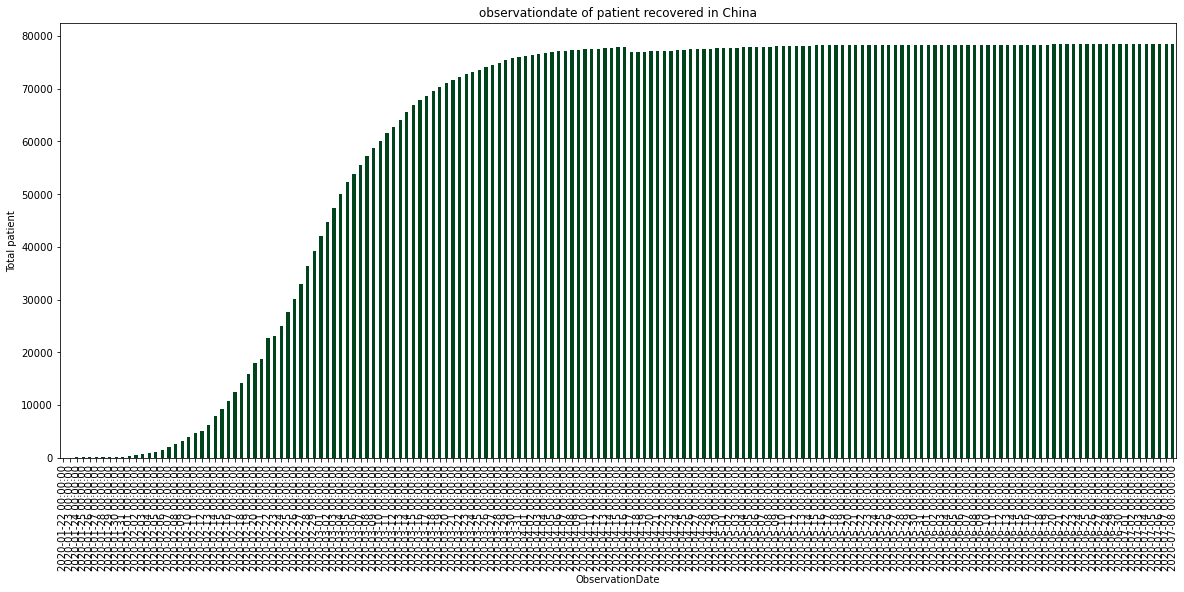

In [61]:
rec_china.plot(figsize=(20,8), kind='bar',title='observationdate of patient recovered in China',\
               colormap='Greens_r')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

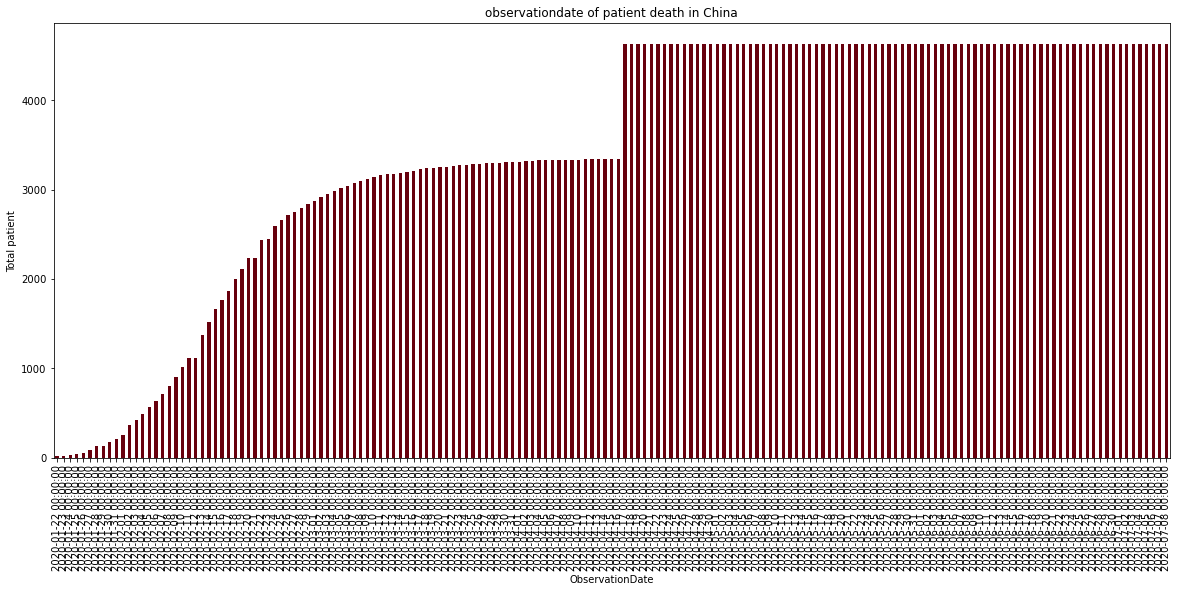

In [62]:
dea_china.plot(figsize=(20,8), kind='bar',title='observationdate of patient death in China', colormap='Reds_r')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

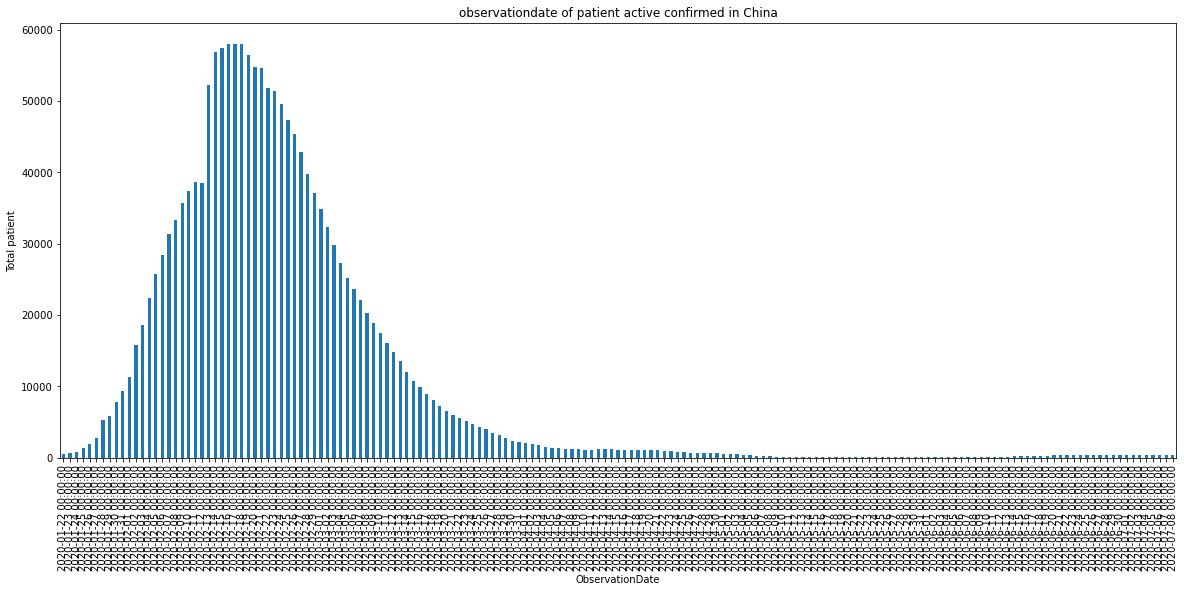

In [63]:
ac_china.plot(figsize=(20,8), kind='bar',title='observationdate of patient active confirmed in China')
plt.ylabel('Total patient')

## rest of the world


In [64]:
#we are going to see the behavior of covid-19 in the rest of the world

In [65]:
rest_world = impute_covid[impute_covid['Country/Region'] != 'Mainland China']
rest_world.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
12,13,2020-01-22,Hong Kong,Hong Kong,2020-01-22 17:00:00,0.0,0.0,0.0,0.0
20,21,2020-01-22,Macau,Macau,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
28,29,2020-01-22,Taiwan,Taiwan,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
31,32,2020-01-22,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,1.0
35,36,2020-01-22,missing_value,Japan,2020-01-22 17:00:00,2.0,0.0,0.0,2.0


In [66]:
print('Novel covid-19 ROW:\n start date = {}\n end date = {}'.format(rest_world.ObservationDate.min(),rest_world.ObservationDate.max()))

Novel covid-19 ROW:
 start date = 2020-01-22 00:00:00
 end date = 2020-07-08 00:00:00


In [67]:
row = rest_world[rest_world['ObservationDate'] == rest_world.ObservationDate.max()]

In [68]:
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
row.Confirmed.sum(), row.Deaths.sum(), row.Recovered.sum(), row.active_confirmed.sum()))

Tota confirmed: 11957899.0
Total Deaths: 544834.0
Total Recovered: 6508136.0
Total active confirmed: 4904929.0



In [69]:
rw = row[['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].groupby('Country/Region').sum()
rwx = rw.sort_values(by=['Confirmed'], ascending=False)
rwx.style.background_gradient(cmap='viridis')

,Confirmed,Deaths,Recovered,active_confirmed
Country/Region,,,,
US,3054699.000000,132300.000000,953420.000000,1968979.000000
Brazil,1713160.000000,67964.000000,1139844.000000,505352.000000
India,767296.000000,21129.000000,476378.000000,269789.000000
Russia,699749.000000,10650.000000,471718.000000,217381.000000
Peru,312911.000000,11133.000000,204748.000000,97030.000000
Chile,303083.000000,6573.000000,271741.000000,24769.000000
UK,288511.000000,44602.000000,1378.000000,242531.000000
Mexico,275003.000000,32796.000000,214316.000000,27891.000000
Spain,252513.000000,28396.000000,150376.000000,73741.000000


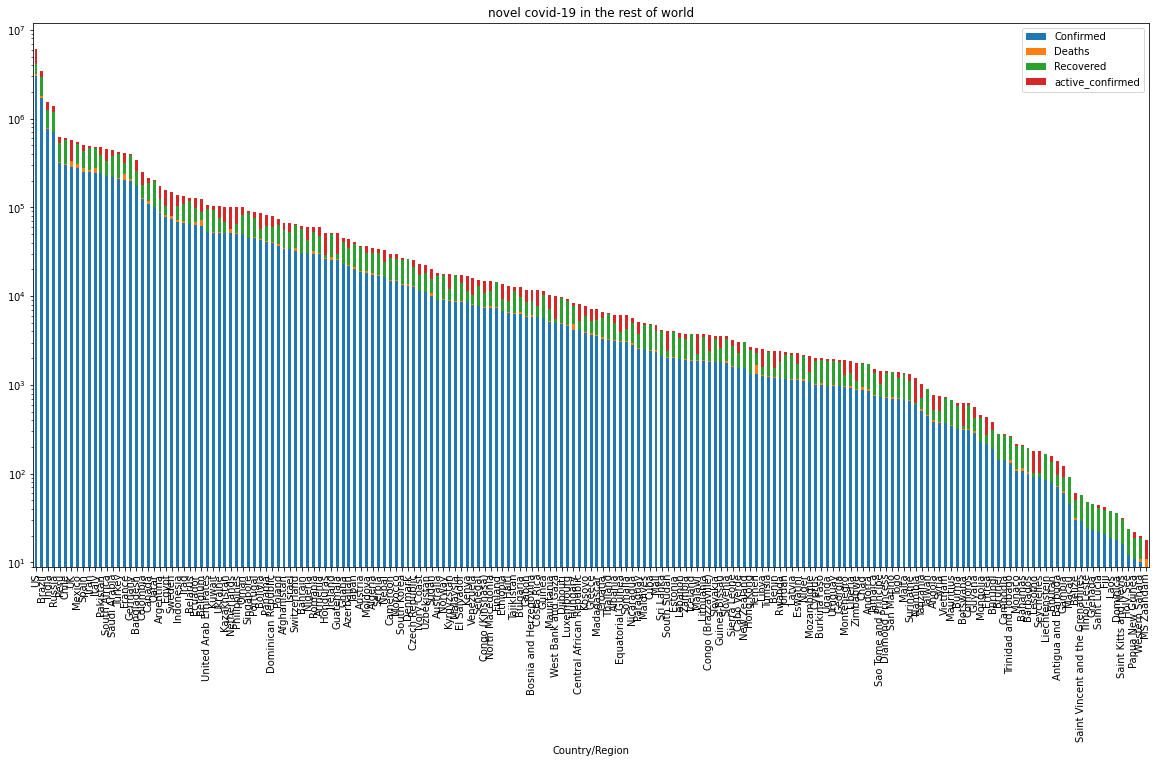

In [70]:
rwx.plot(kind='bar', figsize=(20,10), stacked=True, title='novel covid-19 in the rest of world', logy=True)

In [71]:
obs_conf_world = rest_world.groupby('ObservationDate')['Confirmed'].aggregate([np.sum]) # confirmed obs
ac_conf_world = rest_world.groupby('ObservationDate')['active_confirmed'].aggregate([np.sum]) # last upd obs
patient_world_r = rest_world.groupby('ObservationDate')['Recovered'].aggregate([np.sum]) # lifetime 
patient_world_dea = rest_world.groupby('ObservationDate')['Deaths'].aggregate([np.sum]) # lifetime 

In [72]:
obs_conf_world.columns = ['Confirmed']
ac_conf_world.columns = ['active_onfirmed']
patient_world_r.columns = ['Recovered'] 
patient_world_dea.columns = ['Deaths'] 

Text(0, 0.5, 'total patient')

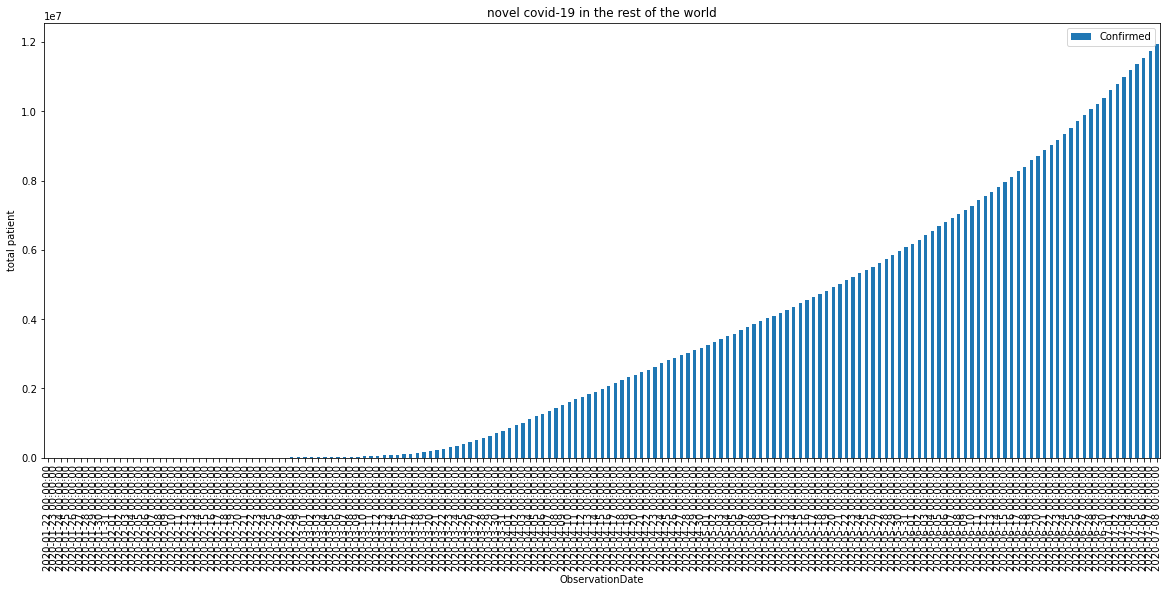

In [73]:
obs_conf_world.plot(figsize=(20,8), title='novel covid-19 in the rest of the world',kind='bar')
plt.ylabel('total patient')

Text(0, 0.5, 'total patient')

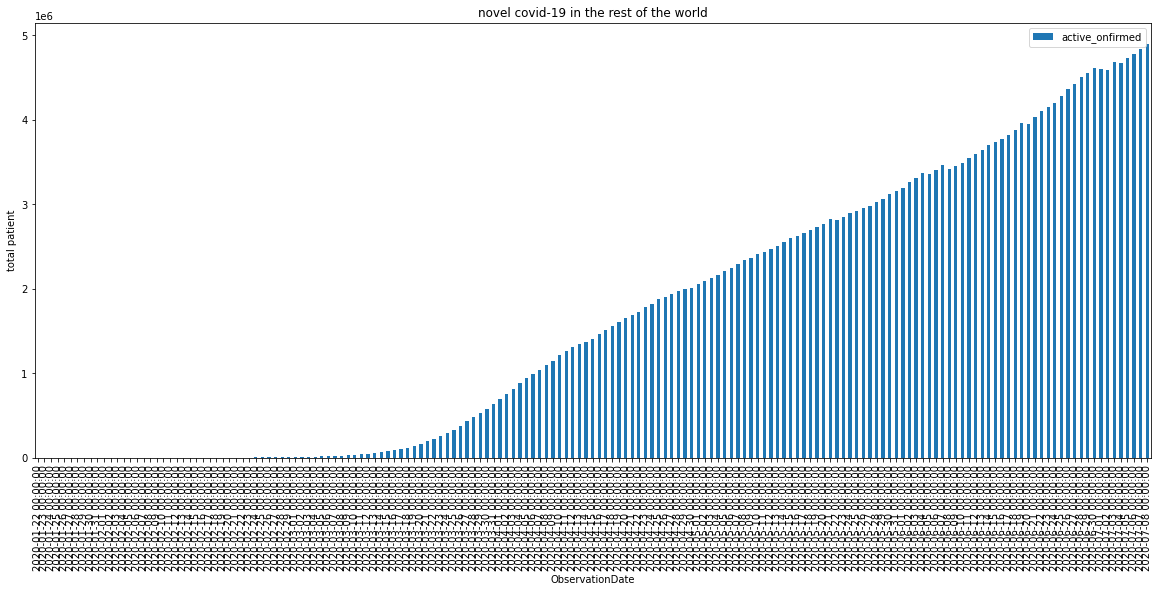

In [74]:
ac_conf_world.plot(figsize=(20,8), title="novel covid-19 in the rest of the world", kind='bar')
plt.ylabel('total patient')

Text(0, 0.5, 'total patient')

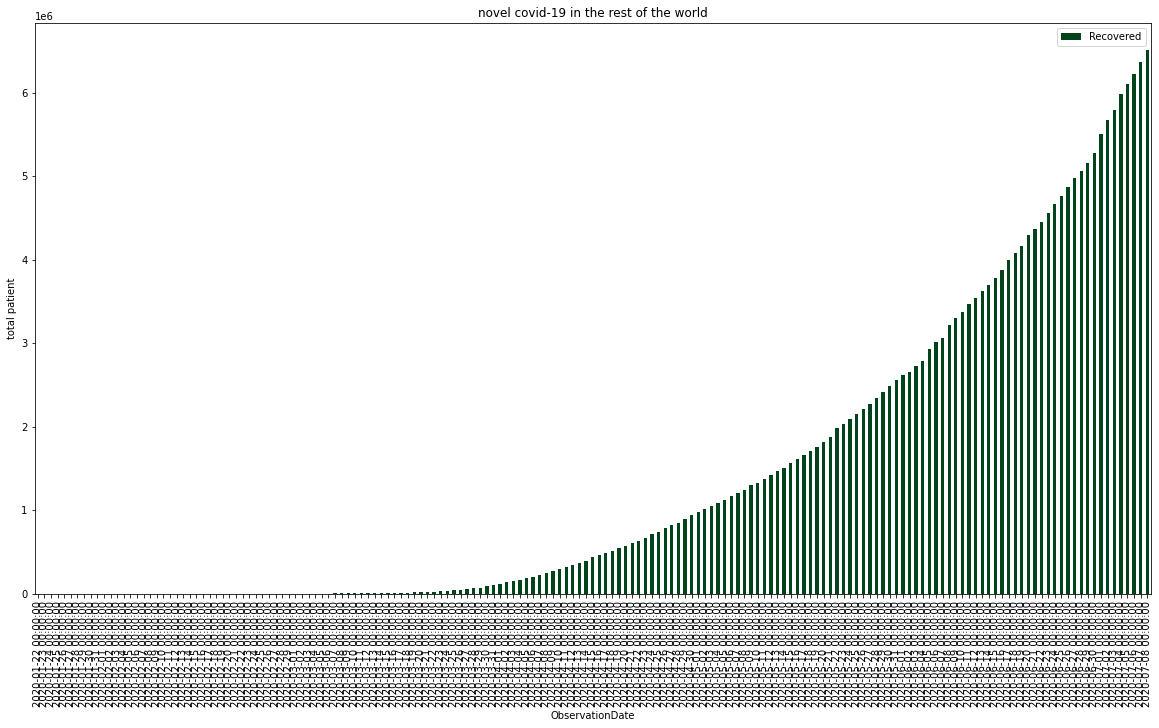

In [75]:
patient_world_r.plot(figsize=(20,10.5), title='novel covid-19 in the rest of the world', kind='bar', colormap='Greens_r')
plt.ylabel('total patient')

Text(0, 0.5, 'total patient')

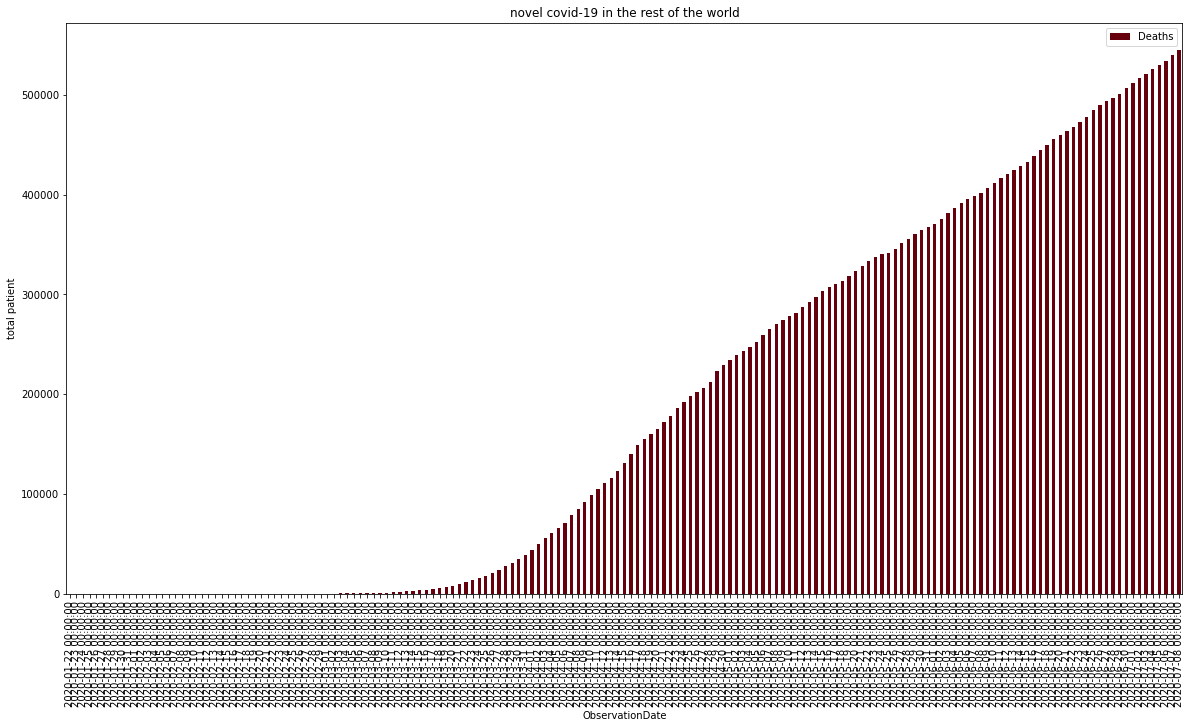

In [76]:
patient_world_dea.plot(figsize=(20,10.5), title='novel covid-19 in the rest of the world', kind='bar', colormap='Reds_r')
plt.ylabel('total patient')

## India's Condition and Report of India based on Spreading of Novel Coronavirus

In [77]:
india = impute_covid[impute_covid['Country/Region'] == 'India']

In [78]:
instart_date = india.ObservationDate.min()
inend_date = india.ObservationDate.max()

In [79]:
print('Novel covid-19 India:\nstart date = {}\nend date = {}'.format(chstart_date, chend_date))

Novel covid-19 India:
start date = 2020-01-22 00:00:00
end date = 2020-07-08 00:00:00


In [80]:
lastIndia = india[india['ObservationDate'] == inend_date]
lastIndia.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
59218,59219,2020-07-08,Andaman and Nicobar Islands,India,2020-07-09 04:34:23,149.0,0.0,77.0,72.0
59219,59220,2020-07-08,Andhra Pradesh,India,2020-07-09 04:34:23,22259.0,264.0,11101.0,10894.0
59235,59236,2020-07-08,Arunachal Pradesh,India,2020-07-09 04:34:23,287.0,2.0,109.0,176.0
59236,59237,2020-07-08,Assam,India,2020-07-09 04:34:23,13336.0,16.0,8729.0,4591.0
59258,59259,2020-07-08,Bihar,India,2020-07-09 04:34:23,13189.0,107.0,9554.0,3528.0


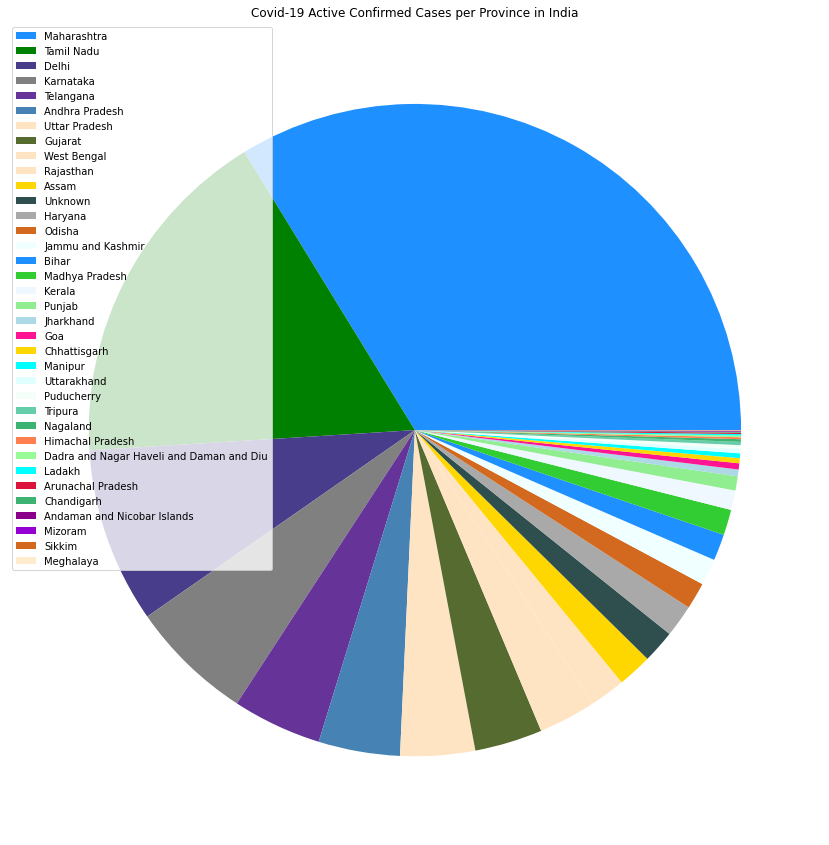

In [81]:
India = lastIndia.sort_values(by=['active_confirmed'], ascending=False)
unique_countries=India['Province/State'].unique()
import random
import matplotlib.colors as mcolors
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(lastIndia['Province/State']))
plt.figure(figsize=(15,15))
plt.title("Covid-19 Active Confirmed Cases per Province in India")
plt.pie(India['active_confirmed'],colors=c)
plt.legend(unique_countries,loc="best")
plt.show()

In [82]:
print('Tota confirmed: {}\nTotal Deaths: {}\nTotal Recovered: {}\nTotal active confirmed: {}\n'.format(\
lastIndia.Confirmed.sum(), lastIndia.Deaths.sum(), lastIndia.Recovered.sum(), lastIndia.active_confirmed.sum()))

Tota confirmed: 767296.0
Total Deaths: 21129.0
Total Recovered: 476378.0
Total active confirmed: 269789.0



In [83]:
India[['Province/State', 'Confirmed', 'Deaths', 'Recovered', 'active_confirmed']].style.background_gradient(cmap='viridis')

,Province/State,Confirmed,Deaths,Recovered,active_confirmed
59474,Maharashtra,223724.000000,9448.000000,123192.000000,91084.000000
59670,Tamil Nadu,122350.000000,1700.000000,74167.000000,46483.000000
59321,Delhi,104864.000000,3213.000000,78199.000000,23452.000000
59424,Karnataka,28877.000000,470.000000,11876.000000,16531.000000
59674,Telangana,29536.000000,324.000000,17279.000000,11933.000000
59219,Andhra Pradesh,22259.000000,264.000000,11101.000000,10894.000000
59712,Uttar Pradesh,31156.000000,845.000000,20331.000000,9980.000000
59366,Gujarat,38333.000000,1993.000000,27289.000000,9051.000000
59739,West Bengal,24823.000000,827.000000,16291.000000,7705.000000
59602,Rajasthan,22063.000000,482.000000,16866.000000,4715.000000


In [84]:
pindia = lastIndia.groupby('Province/State').sum()
pindia = pindia.sort_values(by=['Confirmed'], ascending=False)

Text(0, 0.5, 'Total patient')

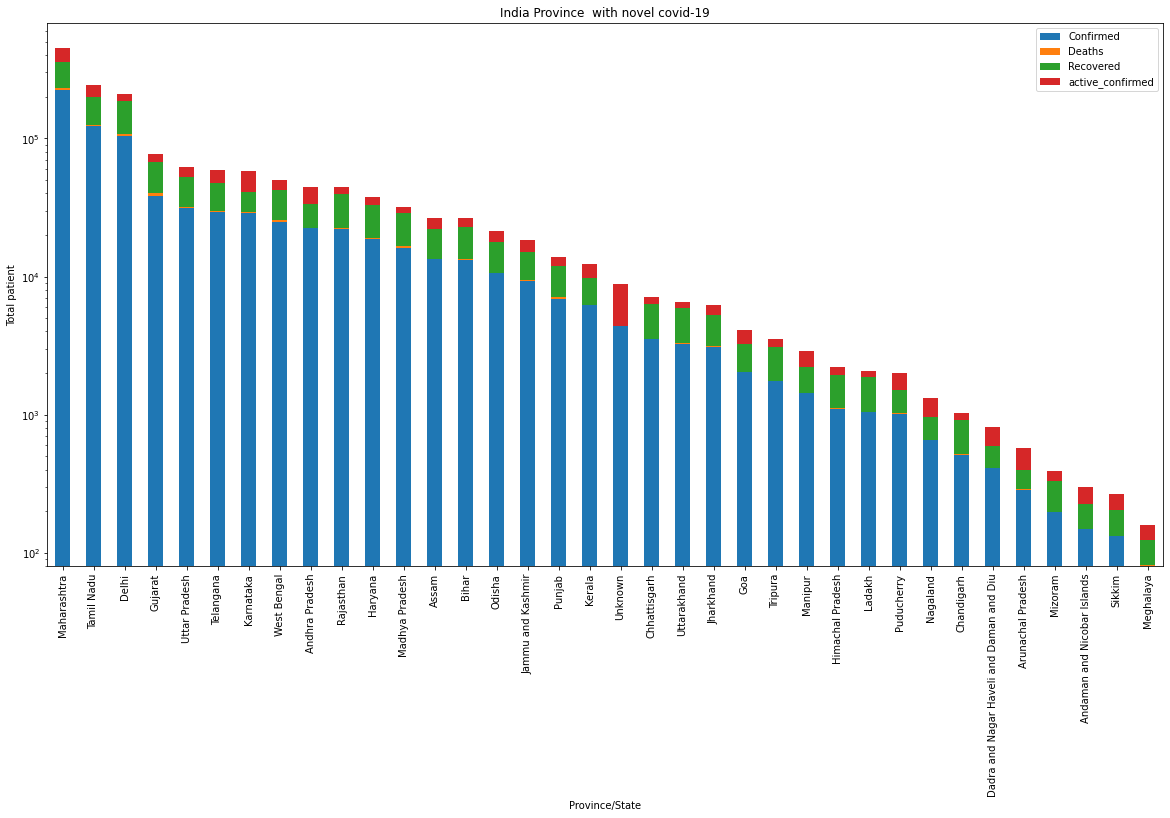

In [85]:
pindia.plot(kind='bar', label='Confirmed',logy=True,figsize=(20,10), stacked=True,title='India Province  with novel covid-19')
plt.ylabel('Total patient')

In [86]:
conf_india = india.groupby('ObservationDate')['Confirmed'].agg('sum')
rec_india = india.groupby('ObservationDate')['Recovered'].agg('sum')
dea_india = india.groupby('ObservationDate')['Deaths'].agg('sum')
ac_india = india.groupby('ObservationDate')['active_confirmed'].agg('sum')

Text(0, 0.5, 'Total patient')

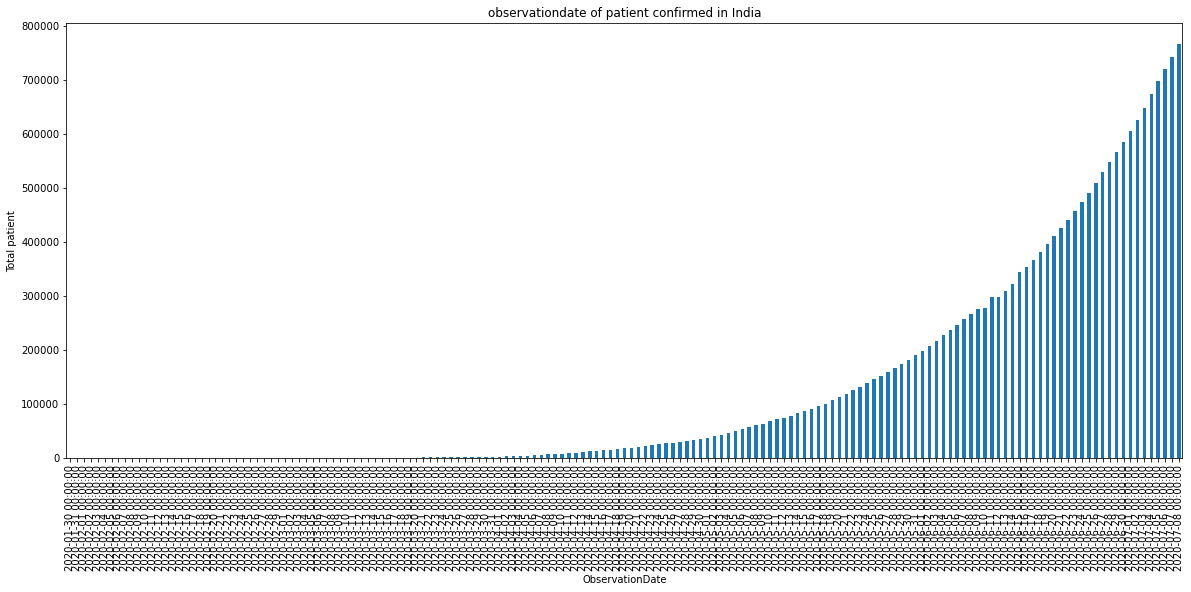

In [87]:
conf_india.plot(figsize=(20,8), kind='bar',title='observationdate of patient confirmed in India')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

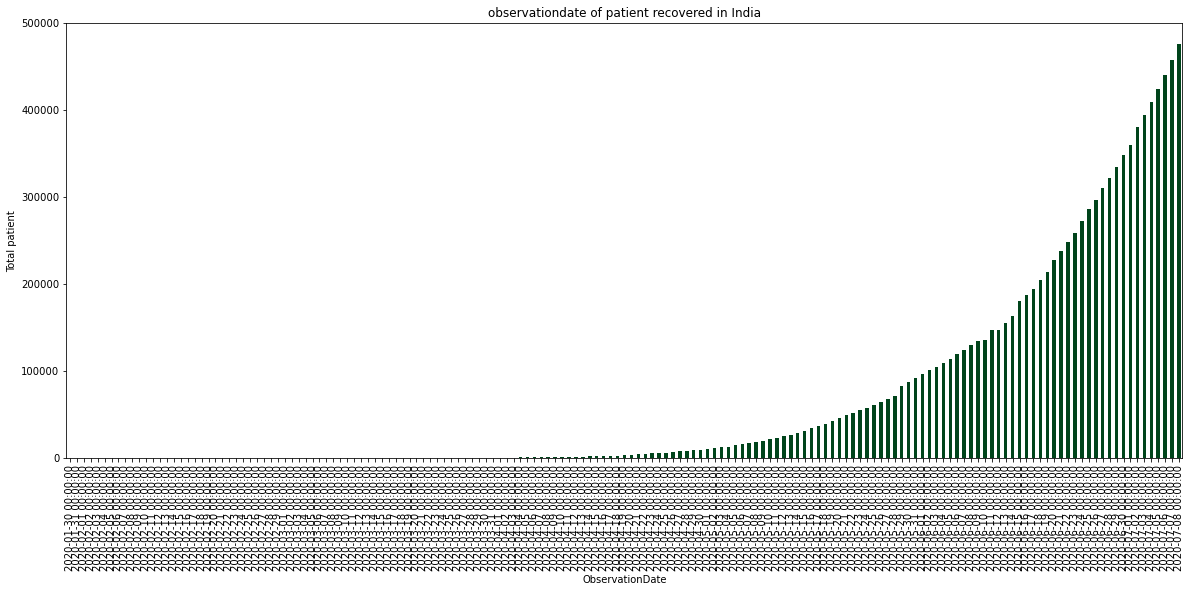

In [88]:
rec_india.plot(figsize=(20,8), kind='bar',title='observationdate of patient recovered in India',\
               colormap='Greens_r')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

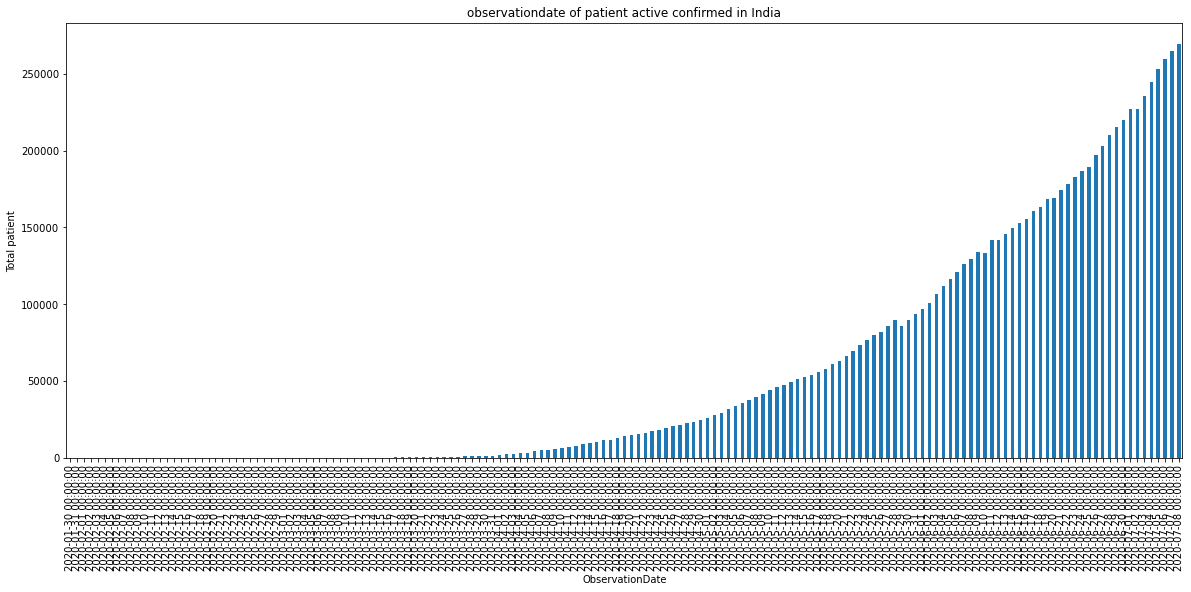

In [89]:
ac_india.plot(figsize=(20,8), kind='bar',title='observationdate of patient active confirmed in India')
plt.ylabel('Total patient')

Text(0, 0.5, 'Total patient')

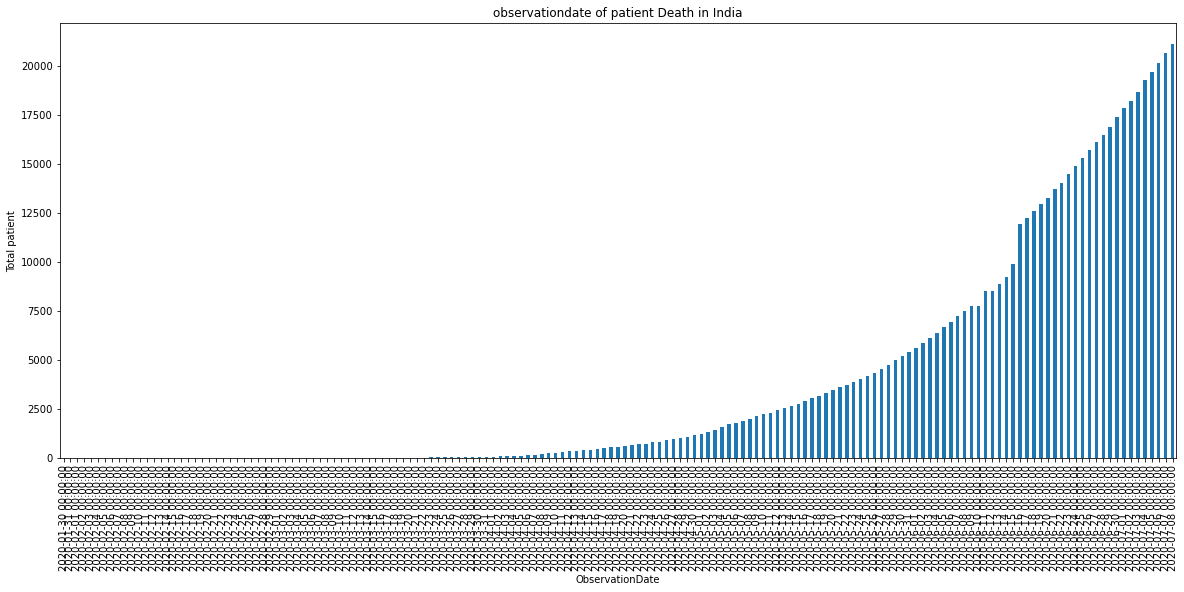

In [90]:
dea_india.plot(figsize=(20,8), kind='bar',title='observationdate of patient Death in India')
plt.ylabel('Total patient')

In [91]:
#We have seen qualitatively, how the COViD-19 is spreading in the World. The next part , 
#we find a model that predict the spread of covid-19 in the time.

In [92]:
confirmed_case = impute_covid[['ObservationDate', 'Confirmed','Province/State']]
confirmed_case = confirmed_case.set_index('ObservationDate')
confirmed_case

,Confirmed,Province/State
ObservationDate,,
2020-01-22,1.0,Anhui
2020-01-22,14.0,Beijing
2020-01-22,6.0,Chongqing
2020-01-22,1.0,Fujian
2020-01-22,0.0,Gansu
...,...,...
2020-07-08,1212.0,Zacatecas
2020-07-08,3533.0,Zakarpattia Oblast
2020-07-08,599.0,Zaporizhia Oblast


In [93]:
import matplotlib.pyplot as plt

#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns 

#statsmodels is a Python library built specifically for statistics. 
#Statsmodels is built on top of NumPy, SciPy, and matplotlib, but 
#it contains more advanced functions for statistical testing and
#modeling that you won't find in numerical libraries like NumPy or SciPy.
import statsmodels as sm

#Simply, manipulate your data in Python, then visualize it on a leaflet map via Folium.
#Folium makes it easy to visualize data that’s been manipulated in Python, on an interactive Leaflet map.
import folium as fl

#pathlib offers a set of classes to handle filesystem paths. 
#Path classes are divided between pure paths, which provide purely computational operations without I/O, and concrete paths, 
#which inherit from pure paths but also provide I/O operations.
from pathlib import Path

#Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.
#Scikit learn is a library used to perform machine learning in Python.
from sklearn.impute import SimpleImputer


sns.set()
%matplotlib inline
pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()

In [94]:
#It features various classification, regression and clustering algorithms 
#including support vector machines, random forests, gradient boosting, k-means and DBSCAN,
# and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
from sklearn.preprocessing import MinMaxScaler
import datetime

In [95]:
confirmed_case = impute_covid[['ObservationDate', 'Confirmed']]
confirmed_case = confirmed_case.set_index('ObservationDate')

In [96]:
confirmed_case.head(3)

,Confirmed
ObservationDate,
2020-01-22,1.0
2020-01-22,14.0
2020-01-22,6.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1c21acf278>,
 'caps': [<matplotlib.lines.Line2D at 0x1c21acfa20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c21acf0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c21adb1d0>],
 'fliers': [],
 'means': []}

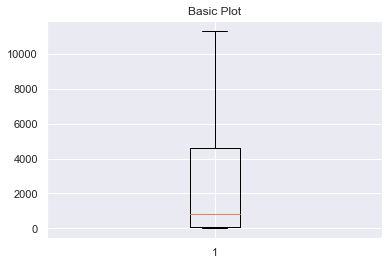

In [97]:
fig, ax = plt.subplots()
ax.set_title('Basic Plot')
ax.boxplot(confirmed_case.Confirmed,showfliers=False)

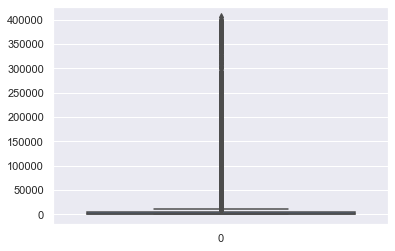

In [98]:
sns.boxplot(data=confirmed_case.Confirmed)

Text(0.5, 1.0, 'confirmed case violin boxplot')

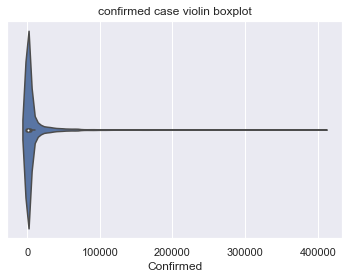

In [99]:
#A violin plot is a method of plotting numeric data. ...
#While a box plot only shows summary statistics such as mean/median and interquartile ranges, 
#the violin plot shows the full distribution of the data. 
#The difference is particularly useful when the data distribution is multimodal
sns.violinplot(confirmed_case.Confirmed)
plt.title('confirmed case violin boxplot')

In [100]:
#np.random.rand() gives Random values in a given shape.
msk = np.random.rand(len(impute_covid)) < 0.8
train = impute_covid[msk]
test = impute_covid[~msk]
test.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,active_confirmed
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0
11,12,2020-01-22,Henan,Mainland China,2020-01-22 17:00:00,5.0,0.0,0.0,5.0
14,15,2020-01-22,Hunan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0,4.0
18,19,2020-01-22,Jilin,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0


In [101]:
#Transform features by scaling each feature to a given range.

#This estimator scales and translates each feature individually such that it is in the given range on the training set, 
#e.g. between zero and one.
scaler = MinMaxScaler(feature_range=(0,1))

#transform replaces the missing values with a number. 
#By default this number is the means of columns of some data that you choose.
confirmed_case['scaled_cases']= scaler.fit_transform(np.array(confirmed_case.Confirmed).reshape(-1,1))

In [102]:
confirmed_case.head()

,Confirmed,scaled_cases
ObservationDate,,
2020-01-22,1.0,0.000002
2020-01-22,14.0,0.000034
2020-01-22,6.0,0.000015
2020-01-22,1.0,0.000002
2020-01-22,0.0,0.000000


In [103]:
#plot_acf :Plot the autocorrelation function
#plot_pacf :Plot the Partial autocorrelation function
#Plots lags on the horizontal and the correlations on vertical axis.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

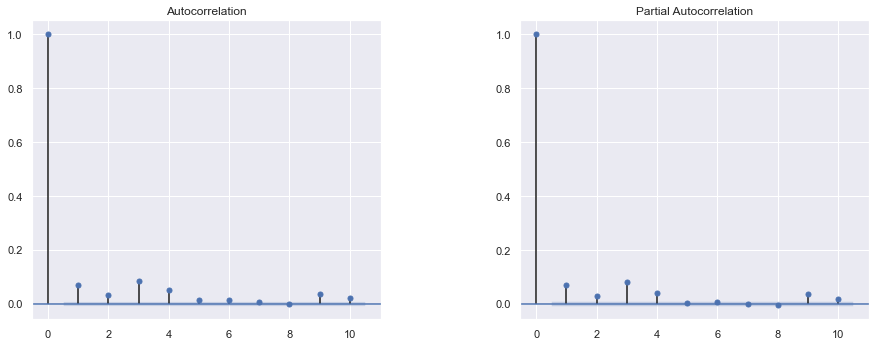

In [104]:
fig = plt.figure(figsize=(15, 5.5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1  = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_acf(confirmed_case.scaled_cases, ax=ax1, lags=10)
plot_pacf(confirmed_case.scaled_cases, ax=ax2, lags=10)
plt.show()

## Trainn Test Splitting

In [105]:
#split a data in train set and test set
split_date = end_date - datetime.timedelta(days=3) + datetime.timedelta(hours=23, minutes=59,seconds=59)
train = confirmed_case[confirmed_case.index <= split_date]
test = confirmed_case[confirmed_case.index > split_date]

In [106]:
print('train shape: {}\ntest shape : {}'.format(train.shape, test.shape))

train shape: (57572, 2)
test shape : (2187, 2)


In [107]:
def makeXy(ts, nb_timesteps): 
     
    #Input:  
    #       ts: original time series 
    #       nb_timesteps: number of time steps in the regressors 
    #Output:  
    #       X: 2-D array of regressors 
    #       y: 1-D array of target  
     
    X = [] 
    y = [] 
    for i in range(nb_timesteps, ts.shape[0]): 
        
        X.append(list(ts.iloc[i-nb_timesteps:i])) 
        y.append(ts.iloc[i]) 
    X, y = np.array(X), np.array(y) 
    return X, y 

In [108]:
lookback = 2 # 3days back 

X_train, y_train = makeXy(train['scaled_cases'], lookback) 
print('Shape of train arrays:', X_train.shape, y_train.shape) 

X_test, y_test = makeXy(test['scaled_cases'], lookback) 
print('Shape of test arrays:', X_test.shape, y_test.shape) 

Shape of train arrays: (57570, 2) (57570,)
Shape of test arrays: (2185, 2) (2185,)


In [109]:
Xtrain = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

Xtest = X_test.reshape((X_test.shape[0], X_test.shape[1], 1)) 

n=  Xtrain.shape[1]
print('Shape of 3D arrays:', Xtrain.shape, Xtest.shape)

Shape of 3D arrays: (57570, 2, 1) (2185, 2, 1)


In [110]:
## fix random seed for reproducibility
np.random.seed(7)

In [111]:
from sklearn.metrics import mean_squared_error

In [112]:
#we take time_Obs see code above
time_obs.head()

,Confirmed
ObservationDate,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1438.0
2020-01-26,2118.0


In [113]:
x = []
x.append(0)
for i in range(time_obs.shape[0]-1):
    a = time_obs.iloc[i+1,0]-time_obs.iloc[i,0]
    x.append(a/time_obs.iloc[i,0])

In [114]:
grown_rate = time_obs.reset_index()
grown_rate['grownRate'] = x
grown_rate.head()

,ObservationDate,Confirmed,grownRate
0,2020-01-22,555.0,0.000000
1,2020-01-23,653.0,0.176577
2,2020-01-24,941.0,0.441041
3,2020-01-25,1438.0,0.528162
4,2020-01-26,2118.0,0.472879


Text(0.5, 0, '$tau$')

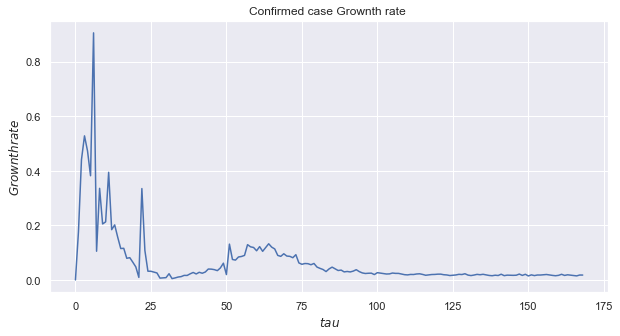

In [115]:
grown_rate.grownRate.plot(figsize=(10,5))
plt.title('Confirmed case Grownth rate ')
plt.ylabel('$Grownth rate$')
plt.xlabel('$tau$')

## USing Linear Regression Model

In [116]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [117]:
trend_model = make_pipeline(PolynomialFeatures(8), LinearRegression(normalize=True, fit_intercept=True))
trend_model.fit(np.array(grown_rate.index).reshape((-1,1)), grown_rate['grownRate'])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('linearregression', LinearRegression(normalize=True))])

In [118]:
print('Trend model coefficient={} and intercept={}'.format(trend_model[1].coef_[0],trend_model[1].intercept_))

Trend model coefficient=0.0 and intercept=0.25237508072004067


In [119]:
dt =np.array(grown_rate.index).reshape((-1,1)) 
fit_grown = trend_model.predict(dt)

In [120]:
errors = grown_rate['grownRate'] - fit_grown

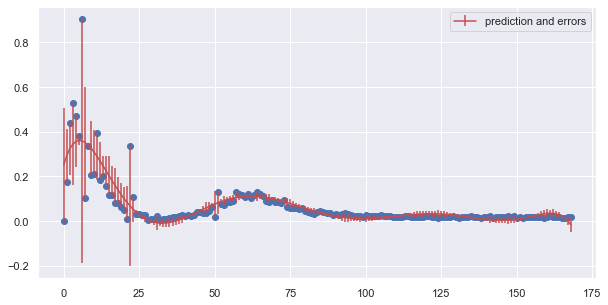

In [121]:
upperlimits = [True, False] 
lowerlimits = [False, True] 
plt.figure(figsize=(10,5))
plt.scatter(dt, grown_rate['grownRate'])
plt.errorbar(dt, fit_grown,yerr = errors,  color='r', label='prediction and errors')
plt.legend(loc='best')
plt.show()

In [122]:
from keras.layers.recurrent import GRU
from keras.layers import Dense, Input, Dropout 
from keras.optimizers import adam, rmsprop
from keras.models import Model 
from keras.models import load_model 
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [123]:
#we compute score
print("Mean Absolute Error : " + str(mean_absolute_error(fit_grown, grown_rate['grownRate'])))

Mean Absolute Error : 0.027017358480562005


In [124]:
#we compute score
print("Mean Sqaured Error : " + str(mean_squared_error(fit_grown, grown_rate['grownRate'])))

Mean Sqaured Error : 0.004036068854618615


In [125]:
#Define input layer which has shape (None, 2) and of type float32. None indicates the number of instances

input_layer = Input(shape=(n,1), dtype='float32')

In [126]:
gru_layer1 = GRU(64, input_shape=(n,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(n,64), return_sequences=False)(gru_layer1)

In [127]:
dropout_layer = Dropout(0.2)(gru_layer2)

In [128]:
#Finally the output layer gives prediction for the next day's confirmed case.

output_layer = Dense(1, activation='linear')(dropout_layer)

In [129]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2, 1)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 2, 64)             12672     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 22,017
Trainable params: 22,017
Non-trainable params: 0
_________________________________________________________________


In [130]:
history = model.fit(x=Xtrain, y=y_train, batch_size=32, epochs=20,verbose=1, validation_data=(Xtest, y_test))

Train on 57570 samples, validate on 2185 samples
Epoch 1/20
57570/57570 [==============================] - 14s 238us/step - loss: 0.0051 - val_loss: 0.0103
Epoch 2/20
57570/57570 [==============================] - 12s 209us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 3/20
57570/57570 [==============================] - 12s 205us/step - loss: 0.0050 - val_loss: 0.0100
Epoch 4/20
57570/57570 [==============================] - 12s 206us/step - loss: 0.0050 - val_loss: 0.0102
Epoch 5/20
57570/57570 [==============================] - 12s 207us/step - loss: 0.0050 - val_loss: 0.0103
Epoch 6/20
57570/57570 [==============================] - 12s 206us/step - loss: 0.0050 - val_loss: 0.0104
Epoch 7/20
57570/57570 [==============================] - 12s 207us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 8/20
57570/57570 [==============================] - 12s 206us/step - loss: 0.0050 - val_loss: 0.0101
Epoch 9/20
57570/57570 [==============================] - 12s 212us/step - loss: 0.0050 - val_l

In [131]:
#we compute a prediction
preds = model.predict(Xtest)
pred_covid19 = scaler.inverse_transform(preds)
pred_covid19 = np.squeeze(pred_covid19)

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
#compute score
rmse = np.sqrt(mean_squared_error(test.Confirmed.iloc[n:] , pred_covid19))
print('RMSE for the test set:', round(rmse, 4))

RMSE for the test set: 40573.0604


In [134]:
actual_pred = pd.DataFrame()
actual_pred['actual'] = test.Confirmed.iloc[n:]
actual_pred['predict'] =  pred_covid19

In [135]:
valid = actual_pred.reset_index()
valid.head()

,ObservationDate,actual,predict
0,2020-07-06,16404.0,12676.942383
1,2020-07-06,855.0,17870.843750
2,2020-07-06,346.0,12419.941406
3,2020-07-06,70.0,8450.033203
4,2020-07-06,80447.0,7857.784180


Text(0, 0.5, ' Total confirmed')

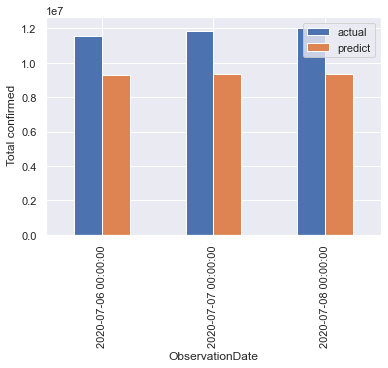

In [136]:
valid.groupby('ObservationDate').sum().plot(kind='bar')
plt.ylabel(' Total confirmed')

In [137]:
#score
trend_model.score(dt, grown_rate['grownRate'])

0.6505848415222153

In [138]:
from datetime import timedelta
next_date = str(end_date+timedelta(days=1))
new_date = pd.date_range(start=next_date, periods=3)
ndt = np.arange(len(new_date)) +len(time_obs)
print('new date {} correspond to new dt {}'.format(new_date, ndt))

new date DatetimeIndex(['2020-07-09', '2020-07-10', '2020-07-11'], dtype='datetime64[ns]', freq='D') correspond to new dt [169 170 171]


In [139]:
# we compute a new grownth rate 
new_rate = trend_model.predict(ndt.reshape((-1,1)))
print('Rate forecast: {}:'.format(new_rate))

Rate forecast: [-0.03794808 -0.06503869 -0.09847461]:


In [140]:
pred_rate = pd.DataFrame()
rate = grown_rate.set_index('ObservationDate')
pred_rate['prediction_grownthRate'] = new_rate 
pred_rate.index=new_date

In [141]:
#we concatenate the two data
data_plot = pd.concat([rate, pred_rate], sort=False)
data_plot.head()

,Confirmed,grownRate,prediction_grownthRate
2020-01-22,555.0,0.000000,NaN
2020-01-23,653.0,0.176577,NaN
2020-01-24,941.0,0.441041,NaN
2020-01-25,1438.0,0.528162,NaN
2020-01-26,2118.0,0.472879,NaN


Text(0.5, 1.0, 'growth rate forecast')

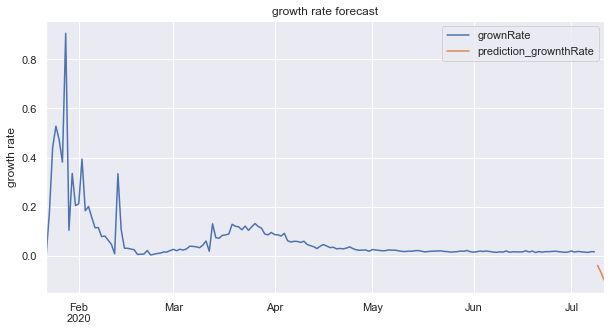

In [142]:
data_plot[['grownRate', 'prediction_grownthRate']].plot(figsize=(10,5))
plt.ylabel('growth rate')
plt.title('growth rate forecast')

In [143]:
residual = pd.Series(data=errors, index=grown_rate.index)

Text(0.5, 1.0, 'Residual between actual and prediction')

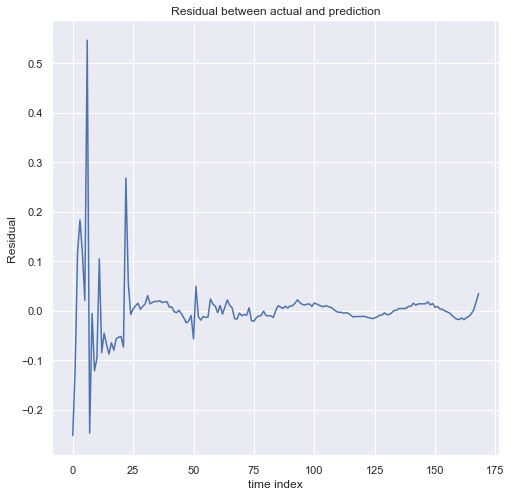

In [144]:
plt.figure(figsize=(8,8))
residual.plot()
plt.xlabel('time index')
plt.ylabel('Residual')
plt.title('Residual between actual and prediction')

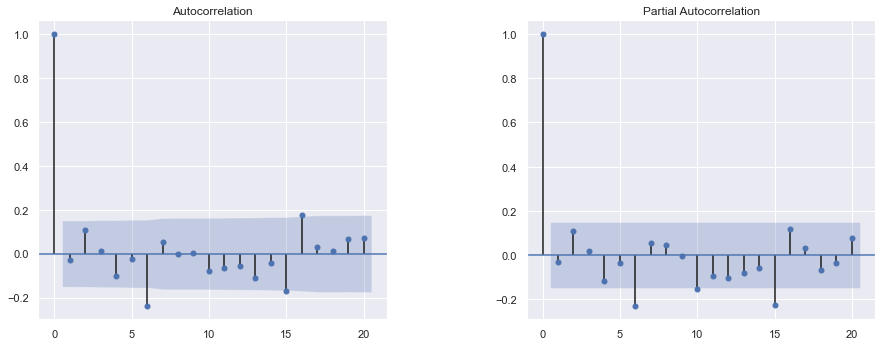

In [145]:
fig = plt.figure(figsize=(15, 5.5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1  = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plot_acf(residual, ax=ax1, lags=20)
plot_pacf(residual, ax=ax2, lags=20)
plt.show()

In [146]:
from statsmodels.tsa import seasonal
residual_decompose = seasonal.seasonal_decompose(residual.tolist(), model='additive',period=7)

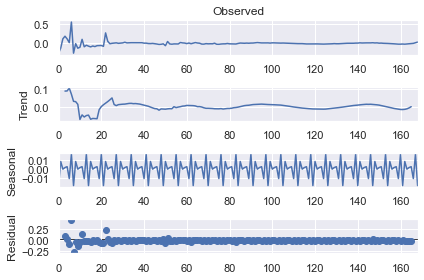

In [147]:
_=residual_decompose.plot()